# Hydropower Analysis using LSTM Neural Networks

## Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default') 

from pandas.plotting import autocorrelation_plot as aplot

import numpy as np
import pandas as pd
import math
import os

from datetime import datetime as dt
from IPython.display import Image, HTML

from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from arcgis.gis import GIS
from arcgis.learn import TimeSeriesModel, prepare_tabulardata
from arcgis.features import FeatureLayer, FeatureLayerCollection
from arcgis.geometry import SpatialReference

import arcpy
from arcpy.sa import*
from arcpy.ia import*

## Login ArcGIS account

In [3]:
# Prompt user to provide username and password
import getpass
username = input('Enter username: ')
password = getpass.getpass("Enter your password: ") 
gis = GIS("https://udistritalfjc.maps.arcgis.com/home", username, password)

Enter username: Camendezv_UDFJC
Enter your password: ········


## Set local workspace

In [2]:
path = os.chdir(r'C:/Users/57320/Dropbox/Mi PC (LAPTOP-5K2HI422)/Desktop/Hydropower Colombia/Reservas y aportes')
path = os.getcwd()
path

'C:\\Users\\57320\\Dropbox\\Mi PC (LAPTOP-5K2HI422)\\Desktop\\Hydropower Colombia\\Reservas y aportes'

# Import Hydropowerstations by Colombia regions

In [4]:
#Antioquia
Penol = pd.pandas.read_excel(r"Peñol.xlsx", index_col='Date',  parse_dates=True)
Penol = Penol.drop(["Daily Useful Volume (%)", "Energy Contributions (MW/h) 95 PSS", "Contributions Rate (m3/s) 95 PSS"], axis=1)
#Caribe
Urra = pd.pandas.read_excel(r"Urra.xlsx", index_col='Date',  parse_dates=True)
Urra = Urra.drop(["Daily Useful Volume (%)", "Energy Contributions (MW/h) 95 PSS", "Contributions Rate (m3/s) 95 PSS"], axis=1)
#Centro
Agre_Bogota = pd.pandas.read_excel(r"AgregadoBogota.xlsx", index_col='Date',  parse_dates=True)
Agre_Bogota = Agre_Bogota.drop(["Daily Useful Volume (%)", "Energy Contributions (MW/h) 95 PSS", "Contributions Rate (m3/s) 95 PSS"], axis=1)
#Oriente
Guavio = pd.pandas.read_excel(r"Guavio.xlsx", index_col='Date',  parse_dates=True)
Guavio = Guavio.drop(["Daily Useful Volume (%)", "Energy Contributions (MW/h) 95 PSS", "Contributions Rate (m3/s) 95 PSS"], axis=1)
#Valle
Salvajina = pd.pandas.read_excel(r"Salvajina.xlsx", index_col='Date',  parse_dates=True)
Salvajina = Salvajina.drop(["Daily Useful Volume (%)", "Energy Contributions (MW/h) 95 PSS", "Contributions Rate (m3/s) 95 PSS"], axis=1)

In [5]:
Penol.info()
Urra.info()
Agre_Bogota.info()
Guavio.info()
Salvajina.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2004-01-01 to 2024-12-01
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Daily Useful Volume (Mm3)          252 non-null    float64
 1   Daily Useful Energy Volume (MW/h)  252 non-null    float64
 2   Energy Contributions (MW/h)        252 non-null    float64
 3   Flow Rate (m3/s)                   252 non-null    float64
dtypes: float64(4)
memory usage: 9.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2004-01-01 to 2024-12-01
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Daily Useful Volume (Mm3)          252 non-null    float64
 1   Daily Useful Energy Volume (MW/h)  252 non-null    float64
 2   Energy Contributions (MW/h)        252 non-null    float64
 3   Flow 

# Visualize Hydropower variables

## Daily Useful Volume (Mm3)

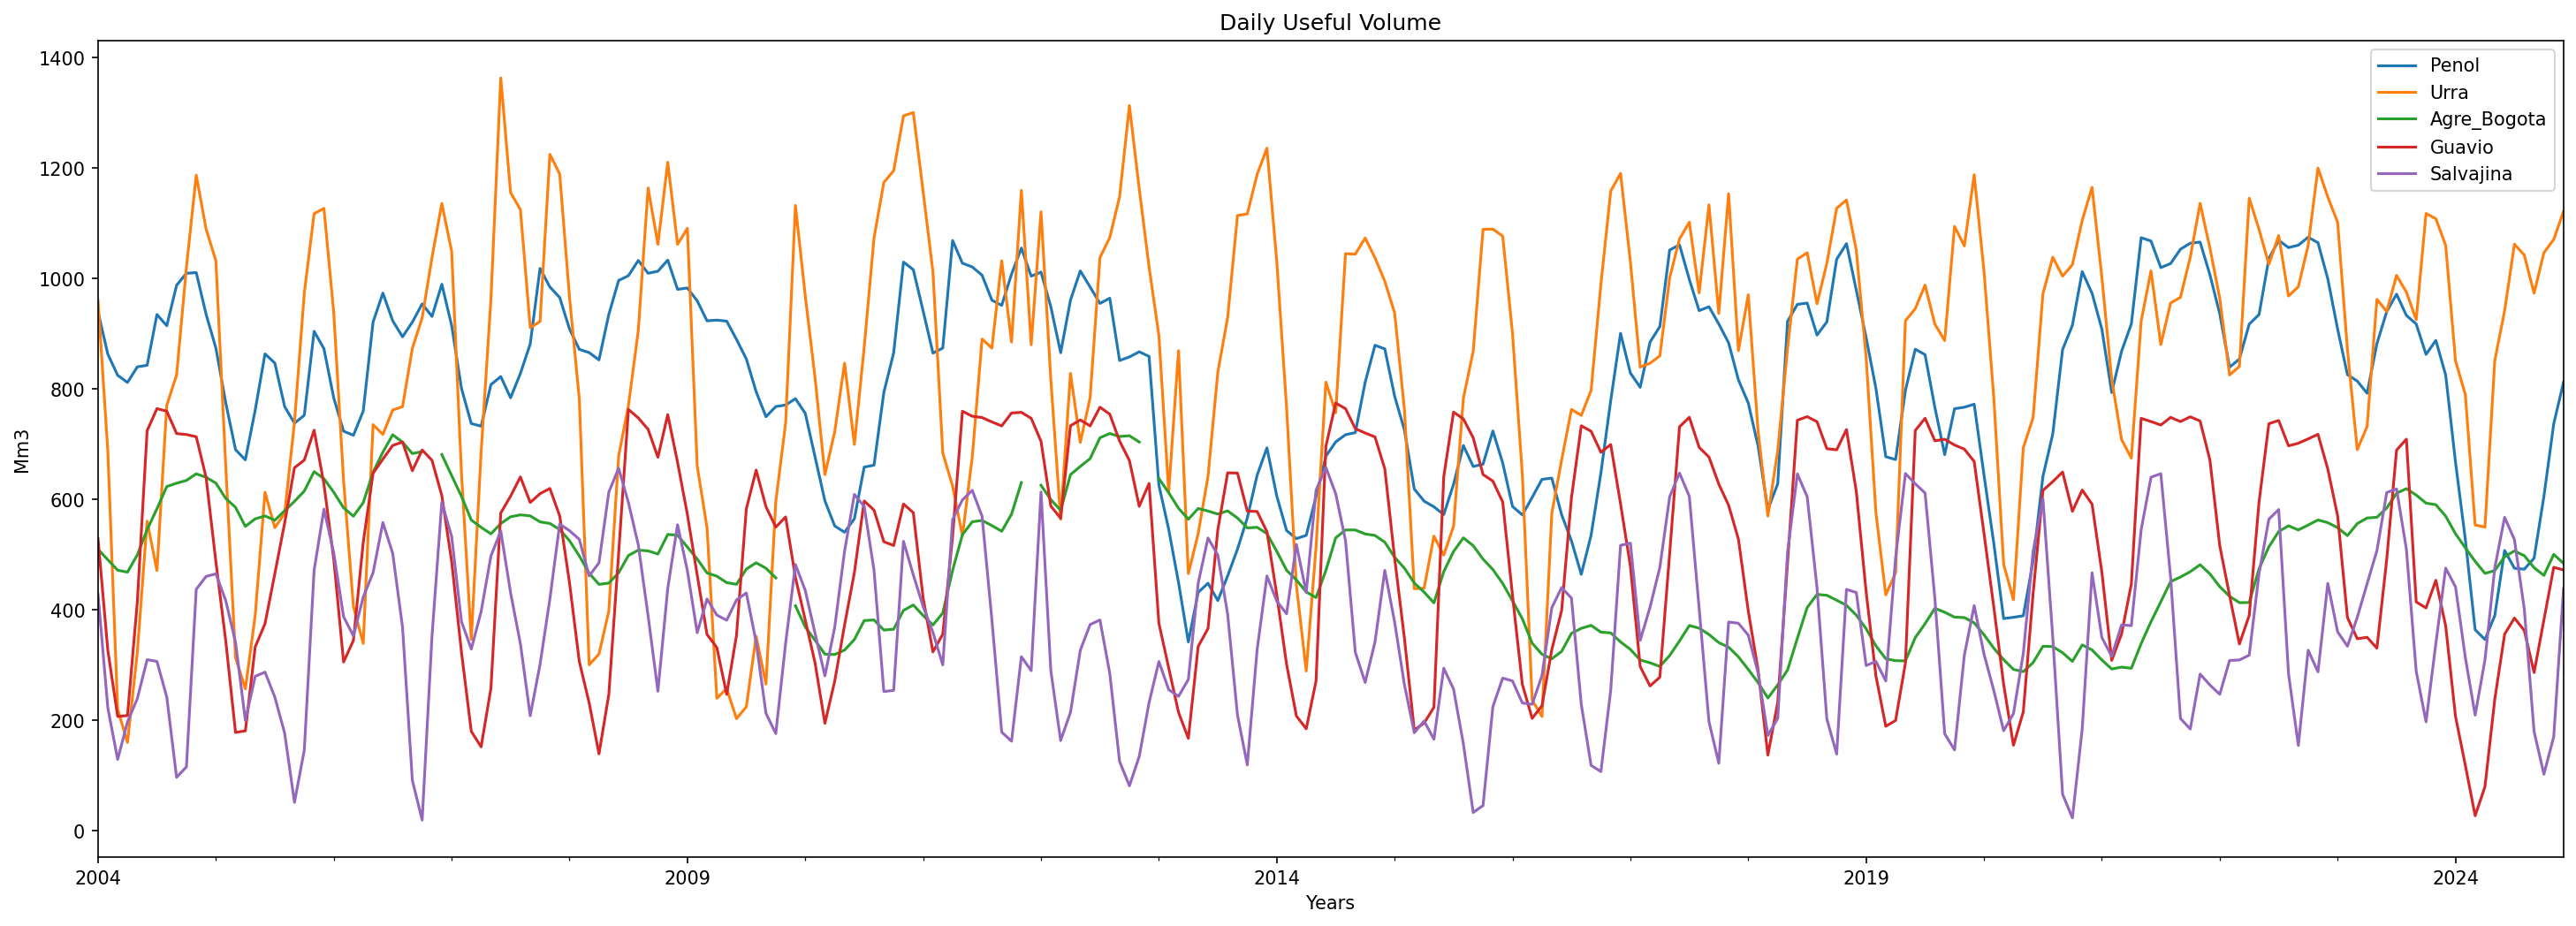

In [6]:
plt.figure(figsize=(24, 8), dpi=150)   
Penol['Daily Useful Volume (Mm3)'].plot(label='Penol') 
Urra['Daily Useful Volume (Mm3)'].plot(label='Urra') 
Agre_Bogota['Daily Useful Volume (Mm3)'].plot(label='Agre_Bogota') 
Guavio['Daily Useful Volume (Mm3)'].plot(label='Guavio') 
Salvajina['Daily Useful Volume (Mm3)'].plot(label='Salvajina') 
plt.title('Daily Useful Volume') 
plt.ylabel('Mm3')
plt.xlabel('Years') 
plt.legend()

## Daily Useful Energy Volume (MW/h)

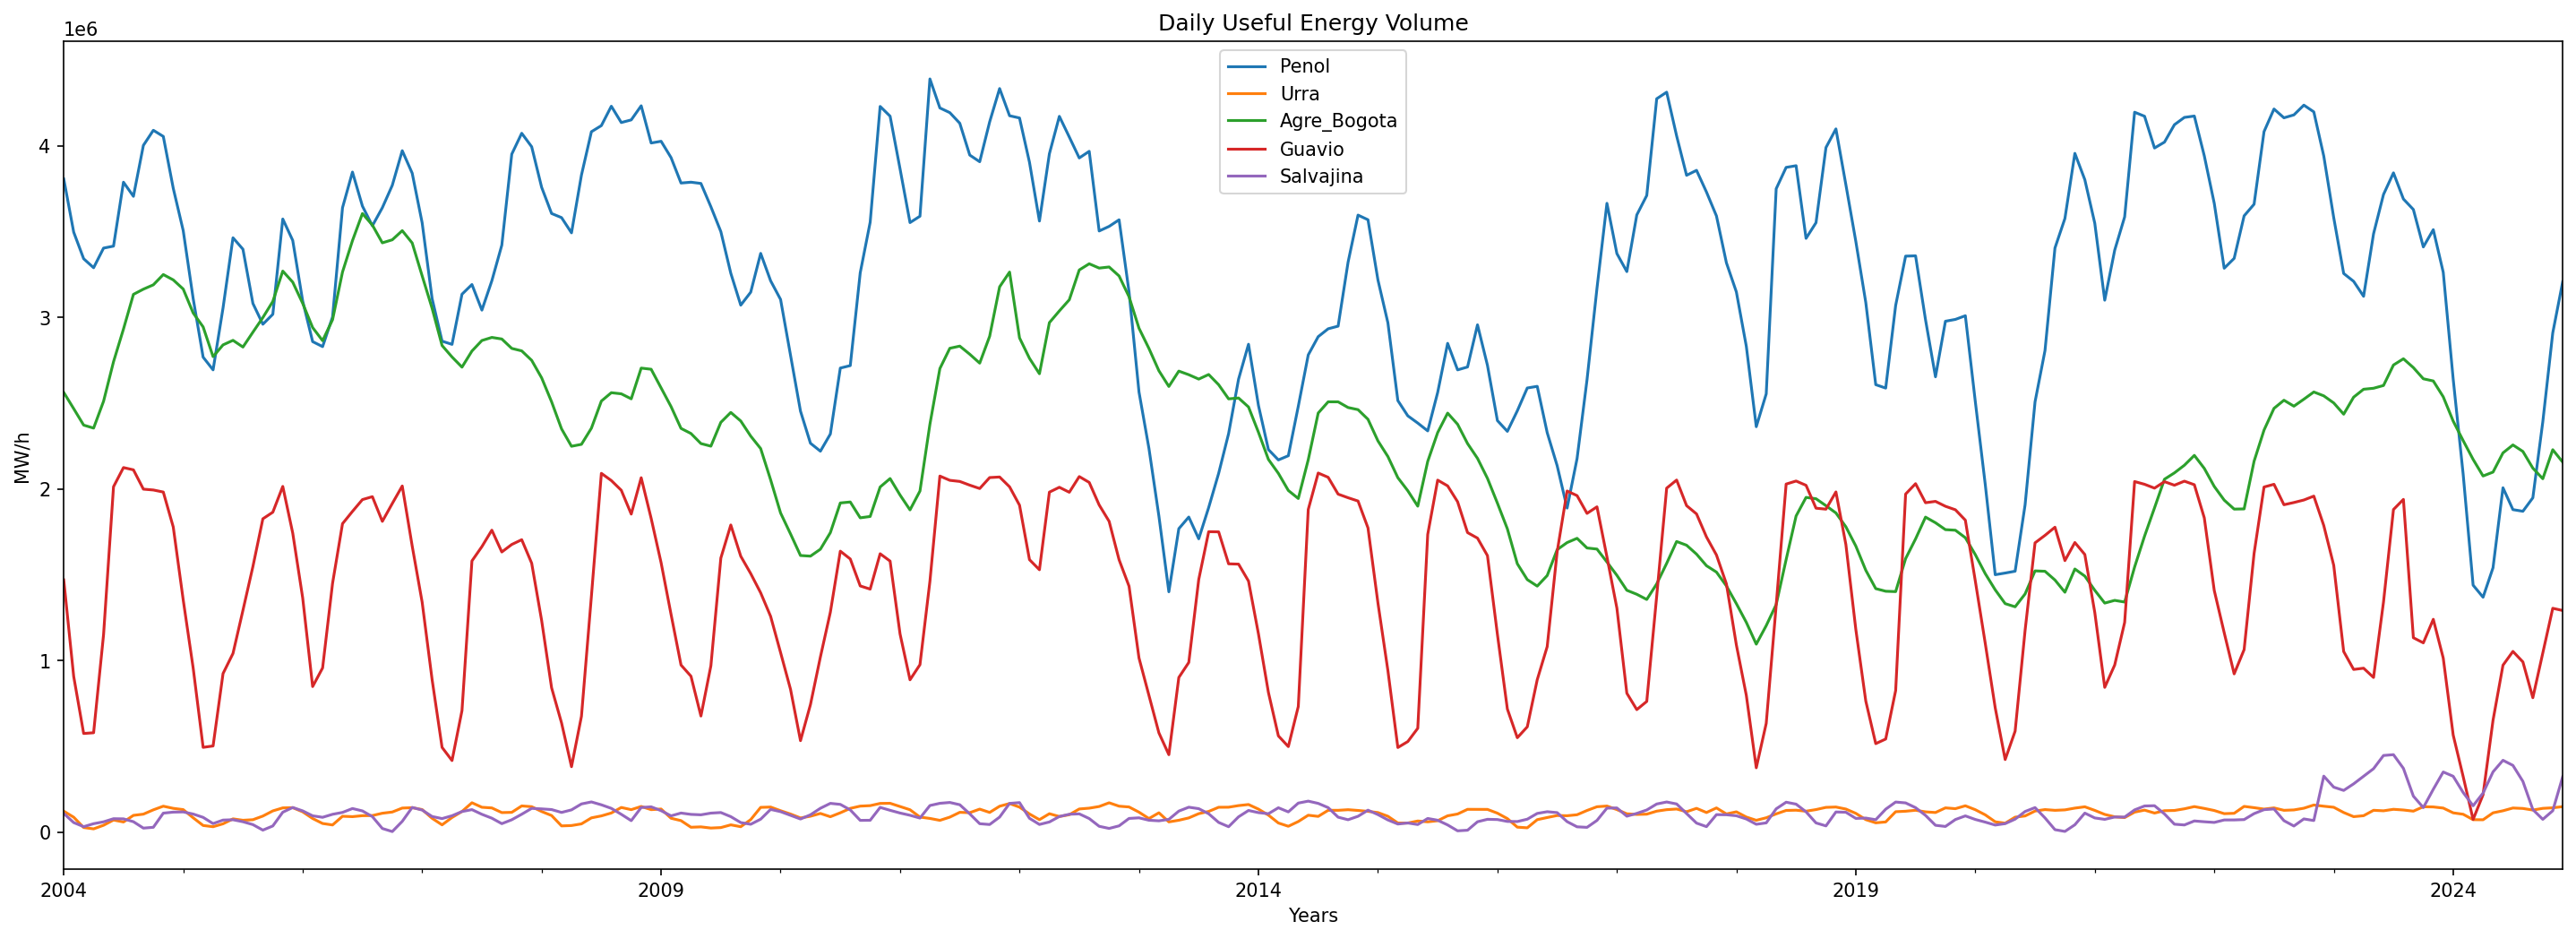

In [7]:
plt.figure(figsize=(24, 8), dpi=150)   
Penol['Daily Useful Energy Volume (MW/h)'].plot(label='Penol') 
Urra['Daily Useful Energy Volume (MW/h)'].plot(label='Urra') 
Agre_Bogota['Daily Useful Energy Volume (MW/h)'].plot(label='Agre_Bogota') 
Guavio['Daily Useful Energy Volume (MW/h)'].plot(label='Guavio') 
Salvajina['Daily Useful Energy Volume (MW/h)'].plot(label='Salvajina') 
plt.title('Daily Useful Energy Volume') 
plt.ylabel('MW/h')
plt.xlabel('Years') 
plt.legend()

## Energy Contributions (MW/h)

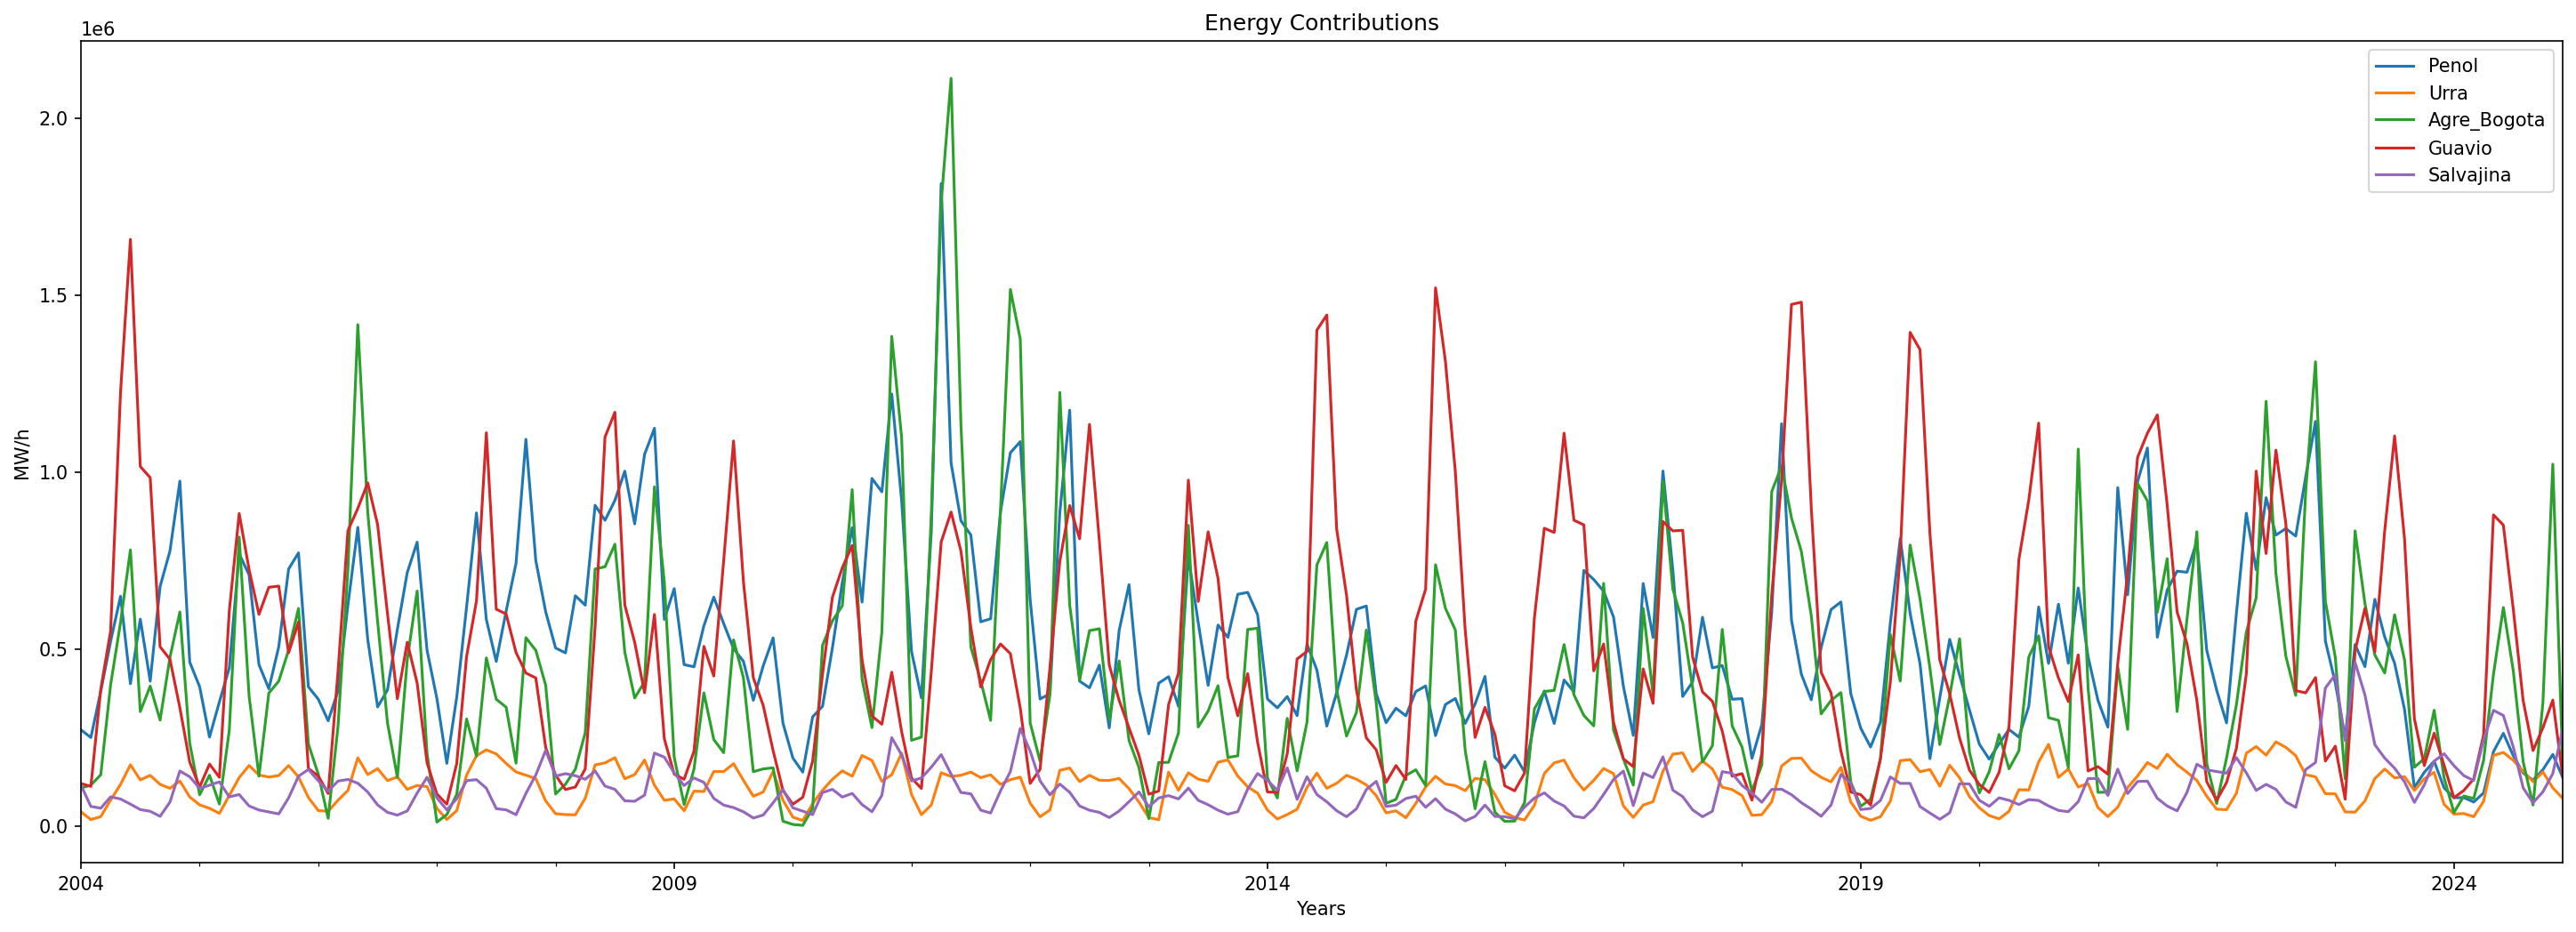

In [8]:
plt.figure(figsize=(24, 8), dpi=150)   
Penol['Energy Contributions (MW/h)'].plot(label='Penol') 
Urra['Energy Contributions (MW/h)'].plot(label='Urra') 
Agre_Bogota['Energy Contributions (MW/h)'].plot(label='Agre_Bogota') 
Guavio['Energy Contributions (MW/h)'].plot(label='Guavio') 
Salvajina['Energy Contributions (MW/h)'].plot(label='Salvajina') 
plt.title('Energy Contributions')
plt.ylabel('MW/h')
plt.xlabel('Years') 
plt.legend()

## Flow Rate (m3/s)

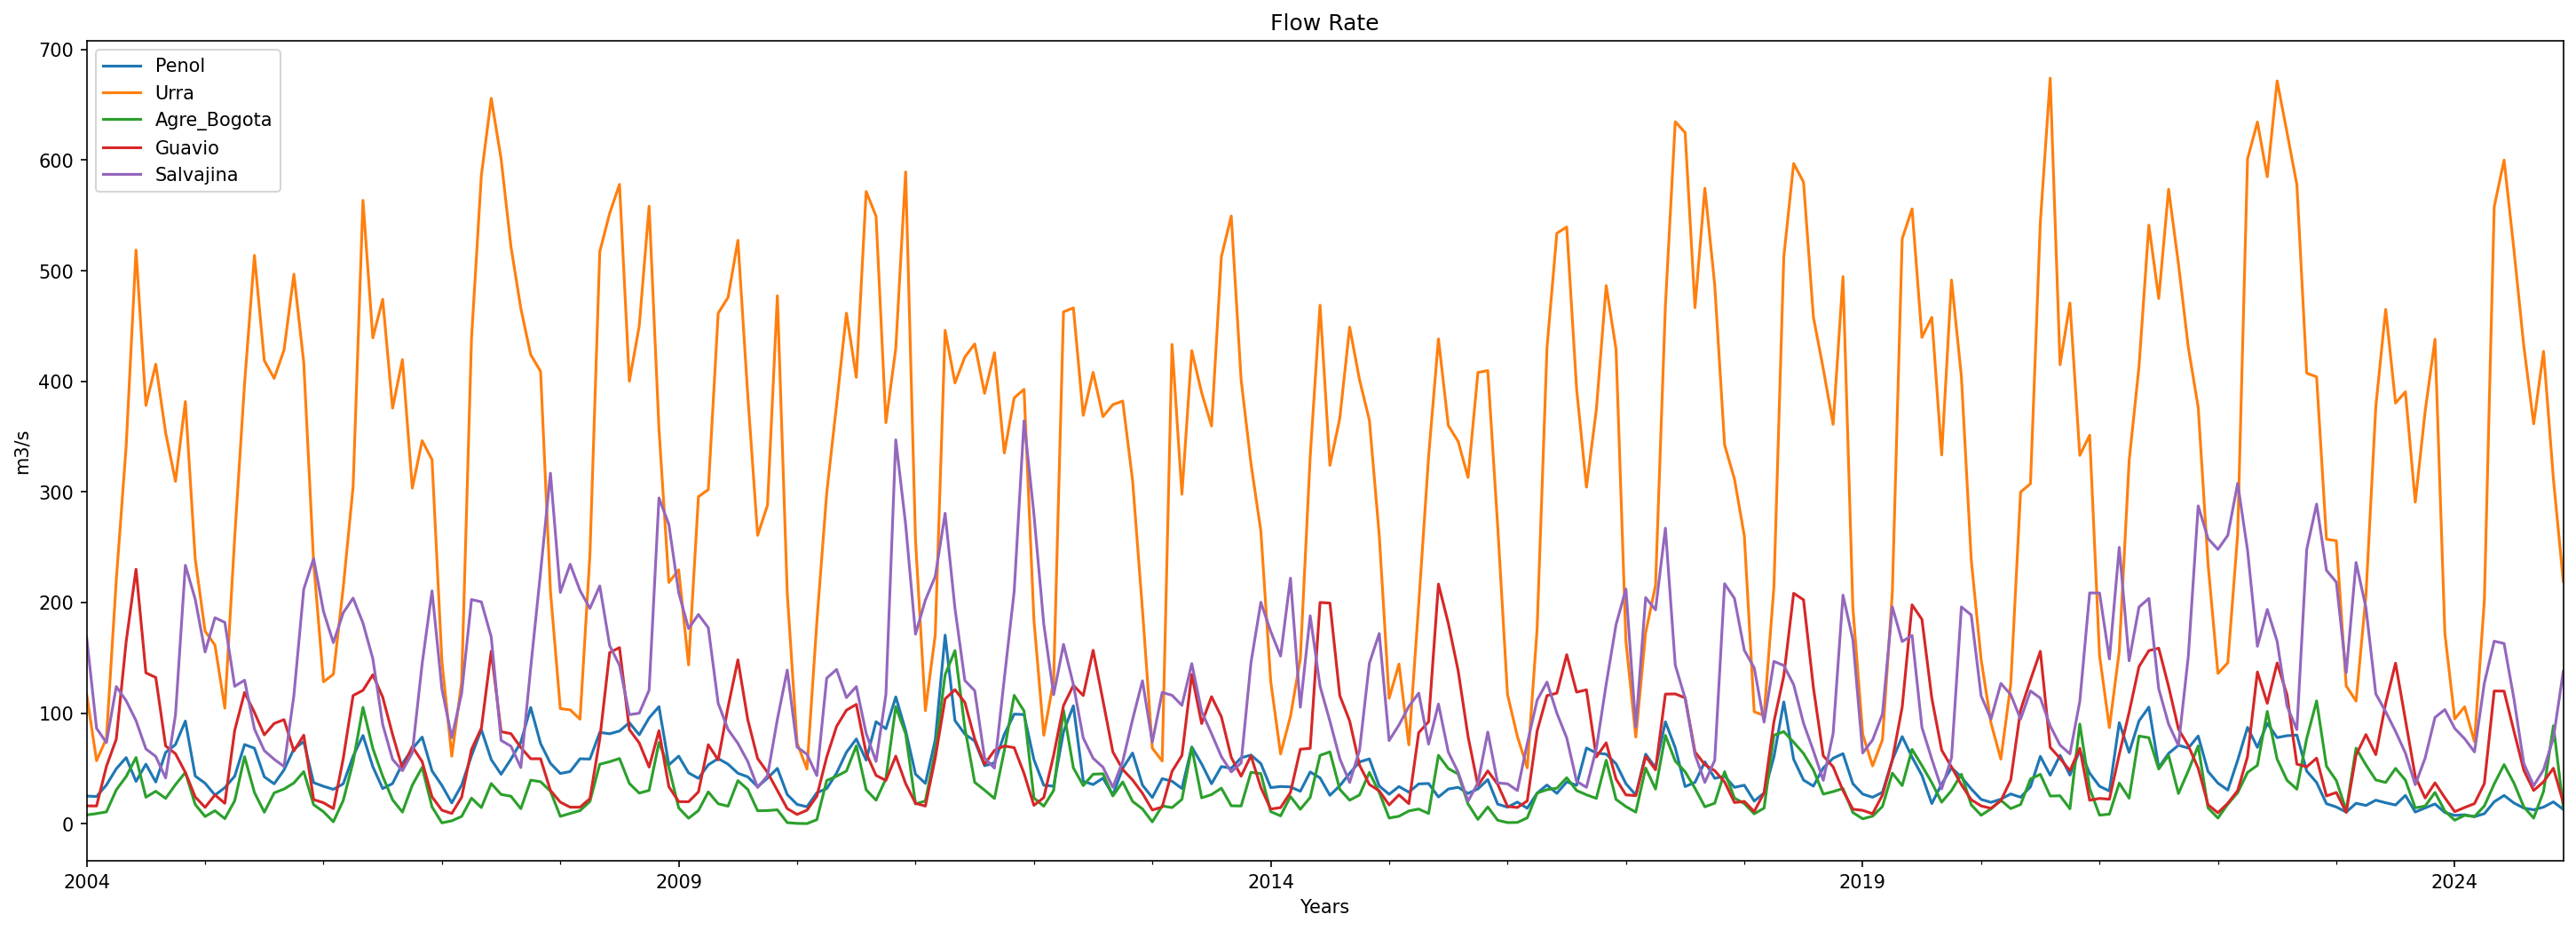

In [9]:
plt.figure(figsize=(24, 8), dpi=150)   
Penol['Flow Rate (m3/s)'].plot(label='Penol') 
Urra['Flow Rate (m3/s)'].plot(label='Urra') 
Agre_Bogota['Flow Rate (m3/s)'].plot(label='Agre_Bogota') 
Guavio['Flow Rate (m3/s)'].plot(label='Guavio') 
Salvajina['Flow Rate (m3/s)'].plot(label='Salvajina') 
plt.title('Flow Rate')
plt.ylabel('m3/s')
plt.xlabel('Years') 
plt.legend()

# Checking autocorrelation of variables by Colombia regions

## Antioquia

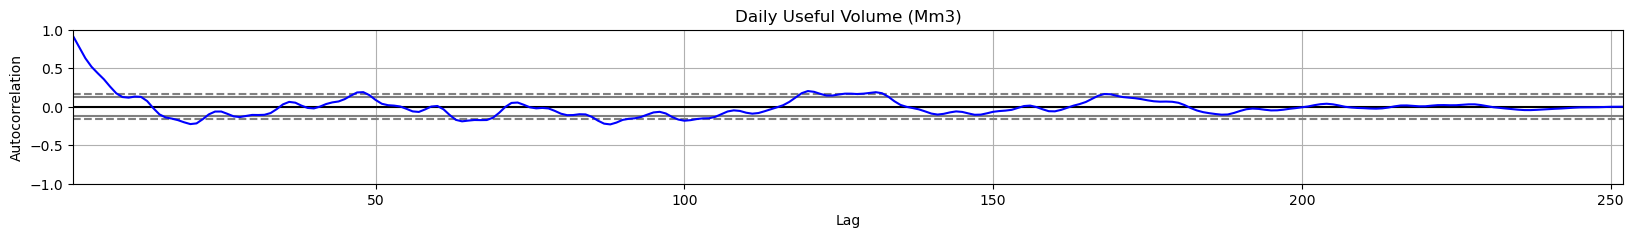

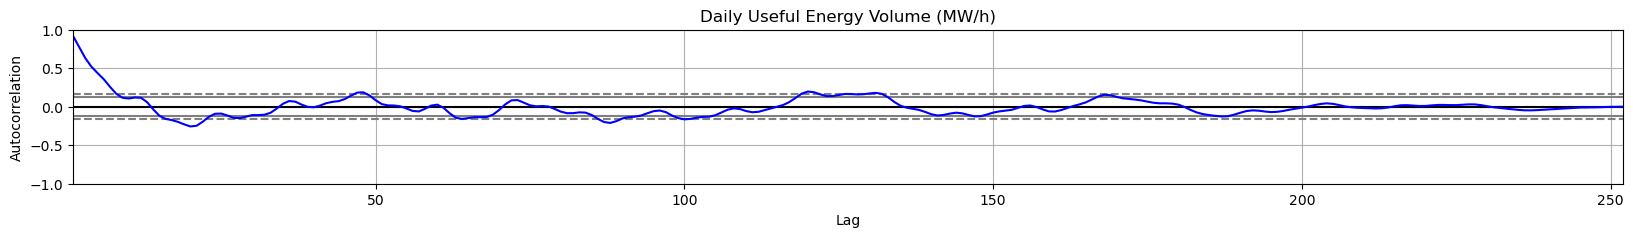

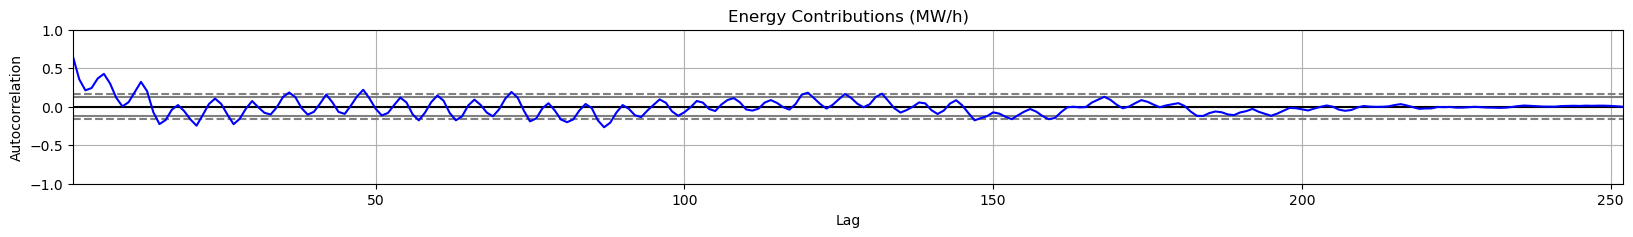

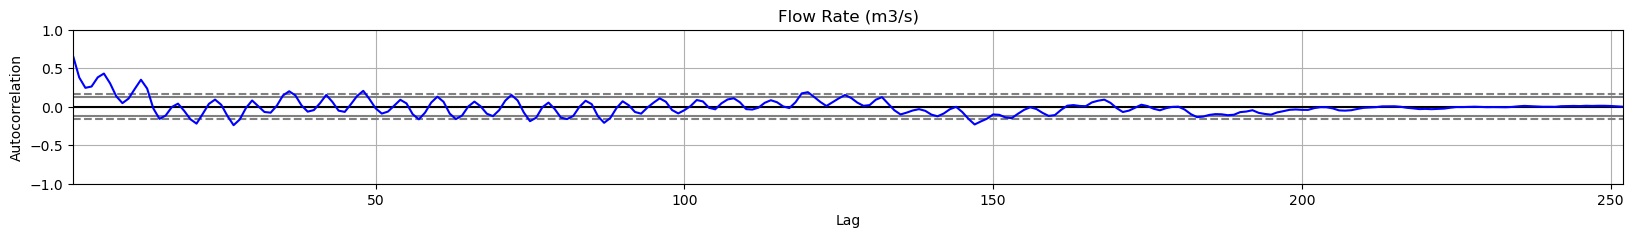

In [10]:
variables = ["Daily Useful Volume (Mm3)", "Daily Useful Energy Volume (MW/h)", "Energy Contributions (MW/h)", "Flow Rate (m3/s)"]
for variable in variables:
    plt.figure(figsize=(20, 2))
    autocorr = aplot(Penol[variable], color="Blue")
    plt.title(variable)

## Caribe

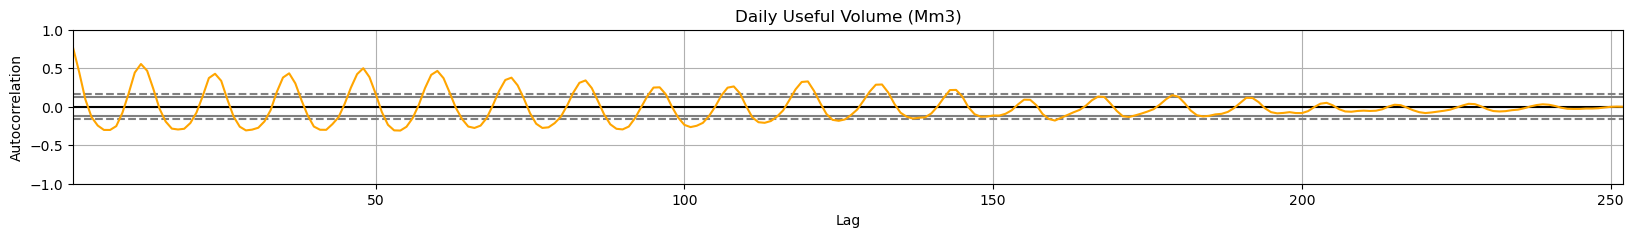

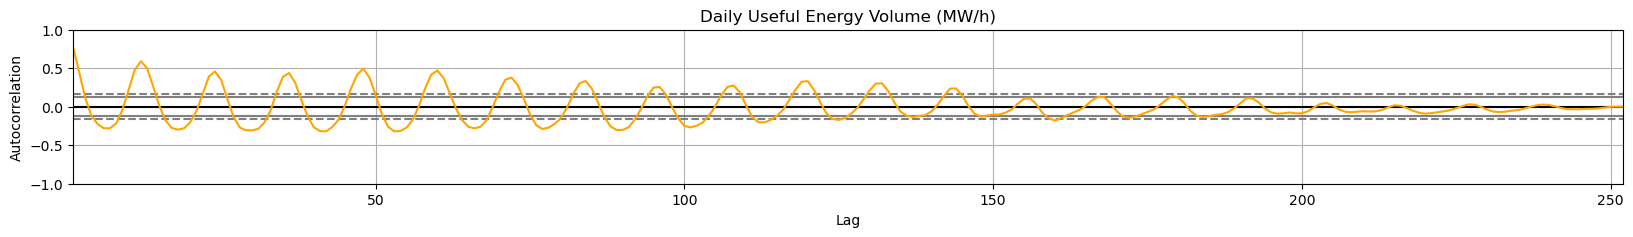

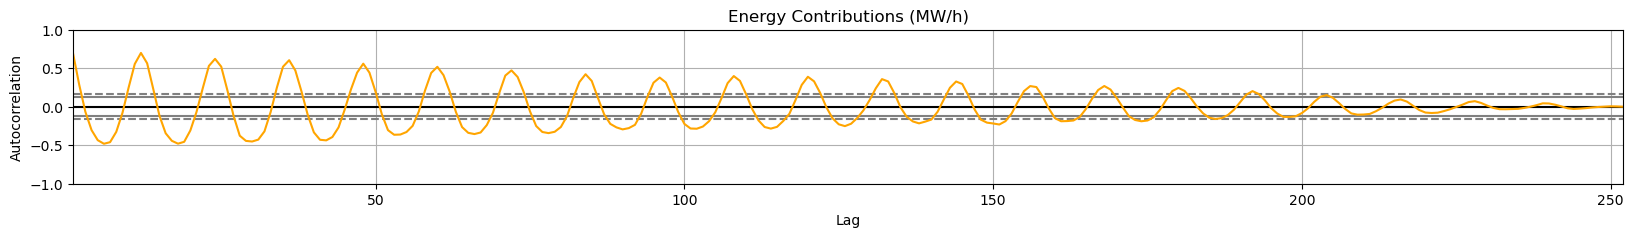

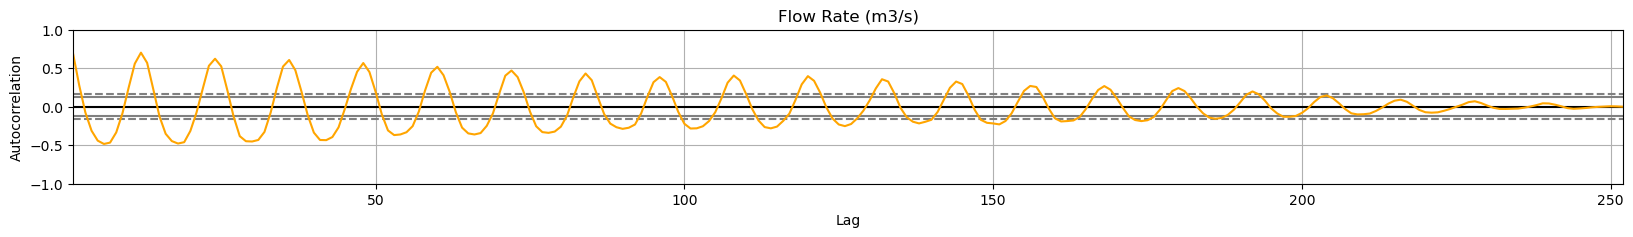

In [11]:
variables = ["Daily Useful Volume (Mm3)", "Daily Useful Energy Volume (MW/h)", "Energy Contributions (MW/h)", "Flow Rate (m3/s)"]
for variable in variables:
    plt.figure(figsize=(20, 2))
    autocorr = aplot(Urra[variable], color="Orange")
    plt.title(variable)

## Centro

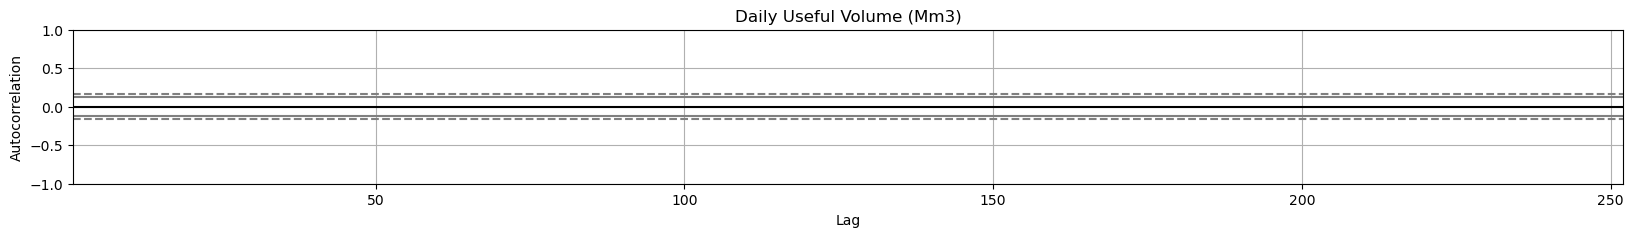

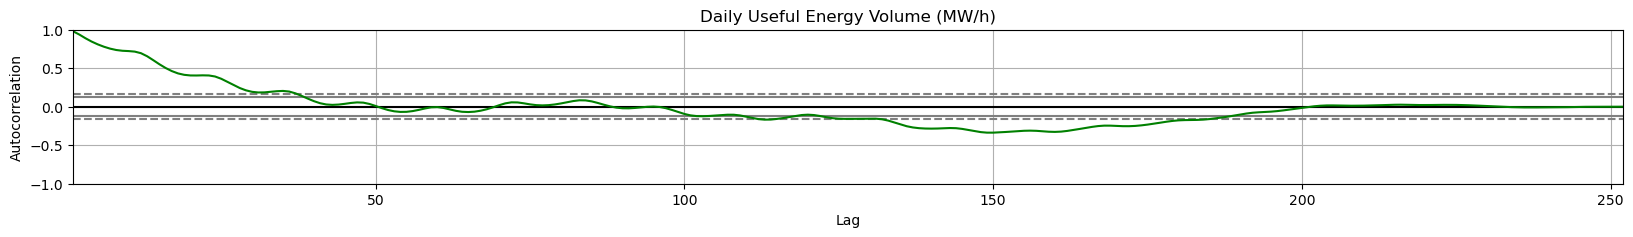

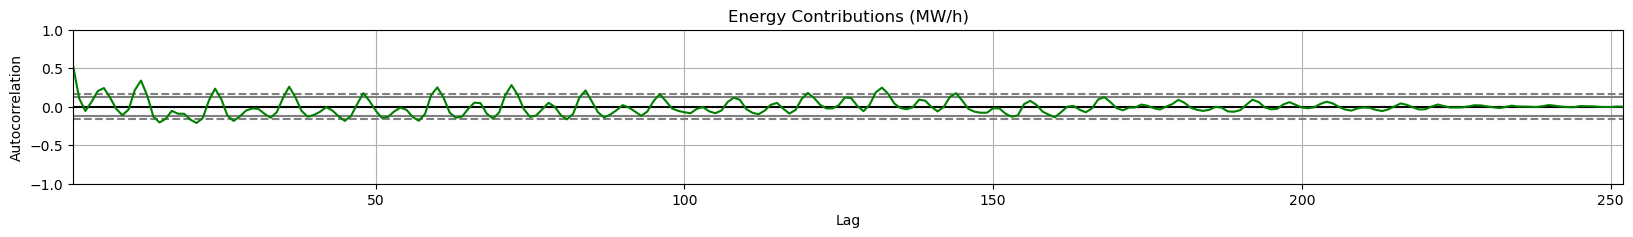

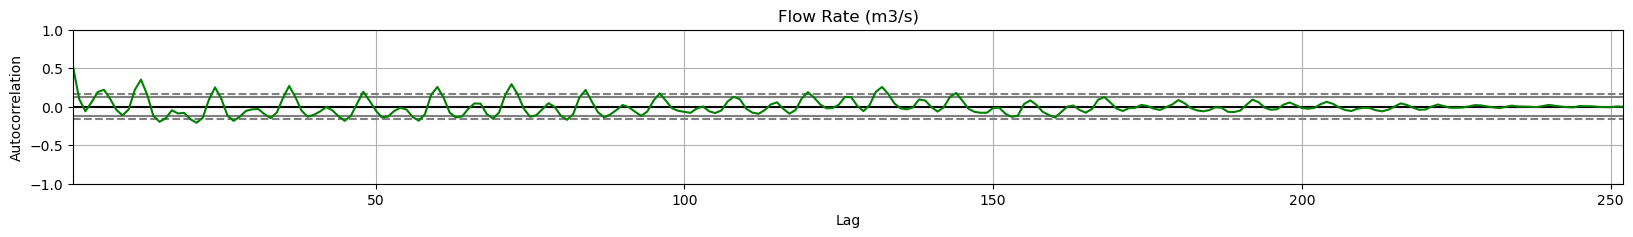

In [12]:
variables = ["Daily Useful Volume (Mm3)", "Daily Useful Energy Volume (MW/h)", "Energy Contributions (MW/h)", "Flow Rate (m3/s)"]
for variable in variables:
    plt.figure(figsize=(20, 2))
    autocorr = aplot(Agre_Bogota[variable], color="Green")
    plt.title(variable)

## Oriente

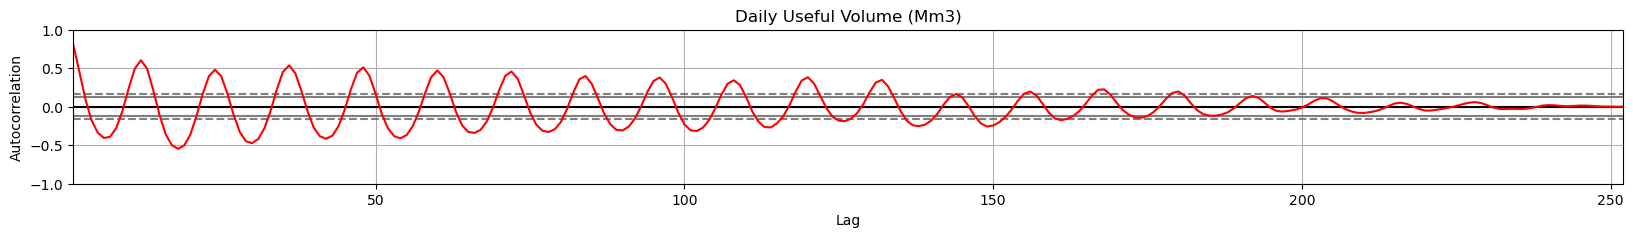

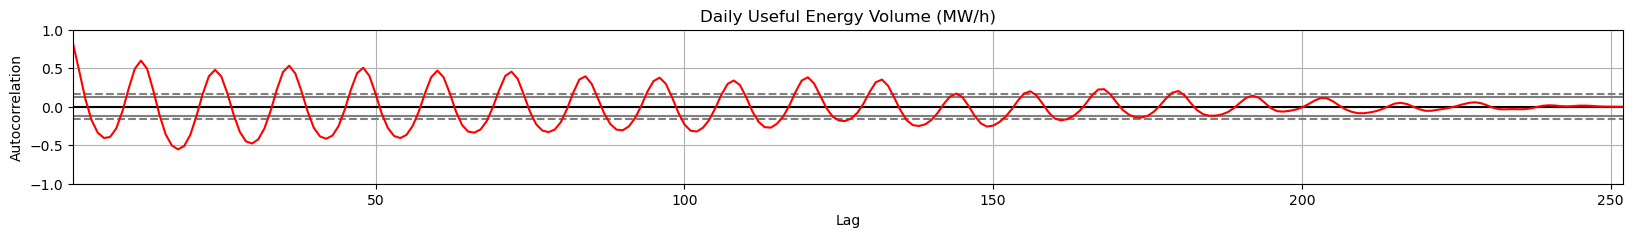

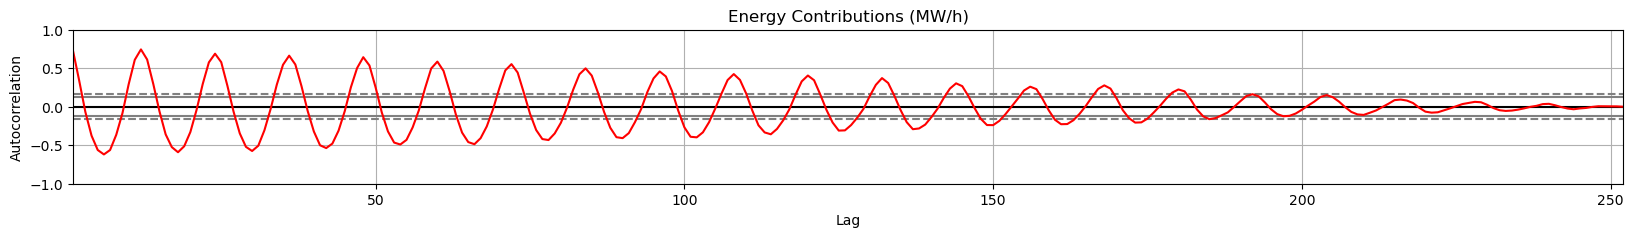

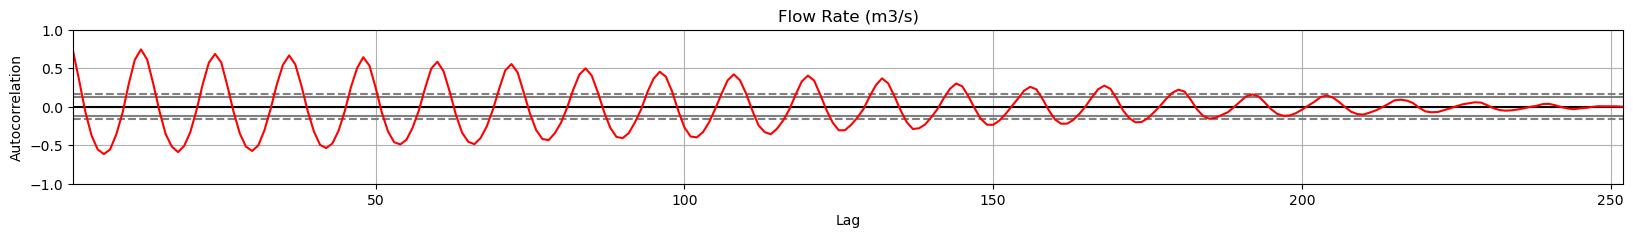

In [13]:
variables = ["Daily Useful Volume (Mm3)", "Daily Useful Energy Volume (MW/h)", "Energy Contributions (MW/h)", "Flow Rate (m3/s)"]
for variable in variables:
    plt.figure(figsize=(20, 2))
    autocorr = aplot(Guavio[variable], color="Red")
    plt.title(variable)

## Valle

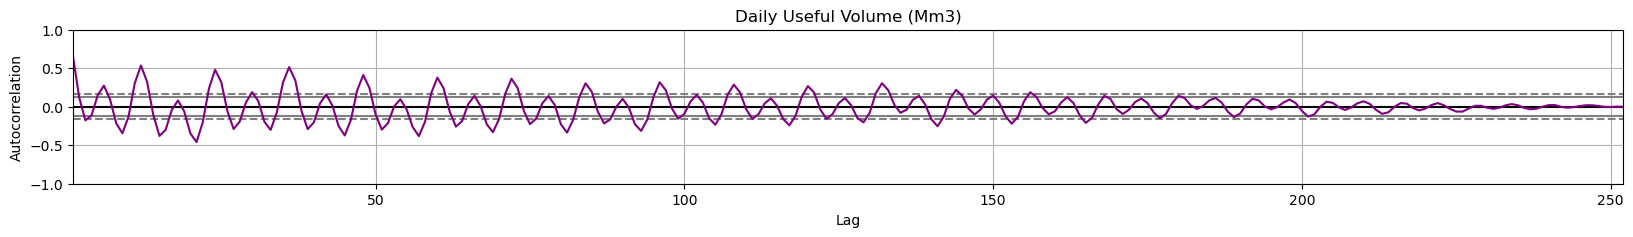

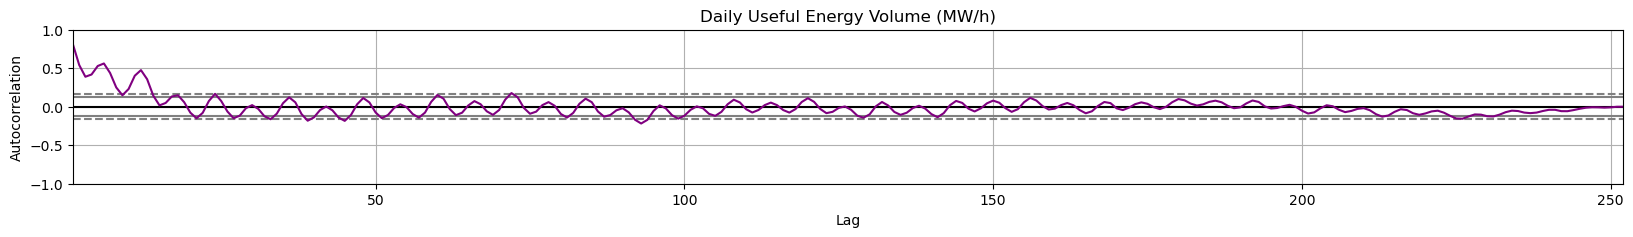

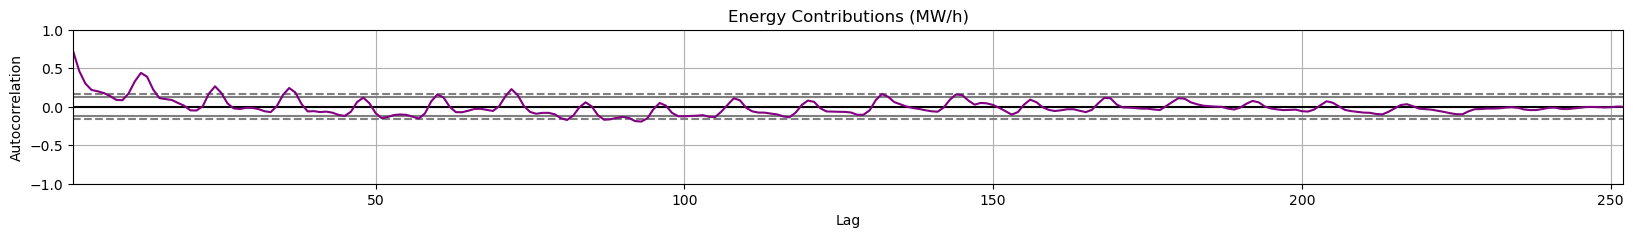

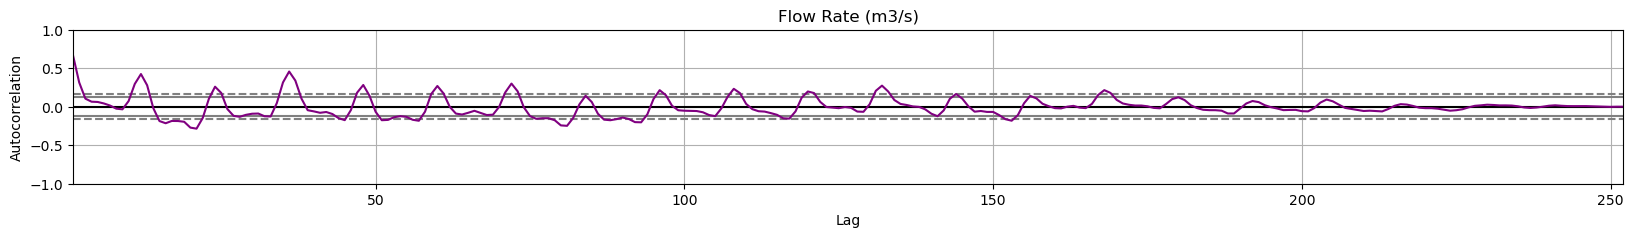

In [14]:
variables = ["Daily Useful Volume (Mm3)", "Daily Useful Energy Volume (MW/h)", "Energy Contributions (MW/h)", "Flow Rate (m3/s)"]
for variable in variables:
    plt.figure(figsize=(20, 2))
    autocorr = aplot(Salvajina[variable], color="Purple")
    plt.title(variable)

# Processing data and times series

In [15]:
## Create future forecast data

def create_dates(start,months):
    v = pd.date_range(start=start, periods=months+1, freq='M', inclusive='right')
    two_years_forecast = pd.DataFrame(index=v) 
    return two_years_forecast

## Create train and test data using an input ratio

def train_test_split(value, name, ratio):
    nrow = len(value)
    print(name+' total samples: ',nrow)
    split_row = 200
    print('Training samples: ',split_row)
    print('Testing samples: ',nrow-split_row)
    train = value.iloc[:split_row]
    test = value.iloc[split_row:]
    return train, test, split_row 

## Transform data using MinMaxScaler function 

def data_transformation(train_tract1,test_tract1):
    scaler = MinMaxScaler()
    
    train_tract1_scaled = scaler.fit_transform(train_tract1)
    test_tract1_scaled = scaler.fit_transform(test_tract1)
    
    train_tract1_scaled_df = pd.DataFrame(train_tract1_scaled, index = train_tract1.index, columns=[train_tract1.columns[0]])
    test_tract1_scaled_df = pd.DataFrame(test_tract1_scaled, index = test_tract1.index, columns=[test_tract1.columns[0]])
    
    return train_tract1_scaled_df, test_tract1_scaled_df, scaler

## Create features using lag or lagged number of predictors 

def timeseries_feature_builder(df, lag):
    df_copy = df.copy()
    for i in range(1,lag):
        df_copy['lag'+str(i)] = df.shift(i) 
    return df_copy
    df_copy = df.copy()
    
## Processing data and make arrays for input 

def make_arrays(train_tract1,test_tract1):
    X_train_tract1_array = train_tract1.dropna().drop(train_tract1.columns[0], axis=1).values
    y_train_tract1_array = train_tract1.dropna()[train_tract1.columns[0]].values
    
    X_test_tract1_array = test_tract1.dropna().drop(test_tract1.columns[0], axis=1).values
    y_test_tract1_array = test_tract1.dropna()[test_tract1.columns[0]].values
    
    return X_train_tract1_array, y_train_tract1_array, X_test_tract1_array, y_test_tract1_array
    
## Store future forecast (24 months)
    
def forecast(model, testX, test_tract1, lag, scaler, months):
    two_years = []
    new0 = testX[-1]        
    last = test_tract1.iloc[-1]
    new_predict = last[0]        
    new_array = np.insert(new0, 0, new_predict)        
    new_array = np.delete(new_array, -1)
    new_array_reshape = np.reshape(new_array, (-1,1,lag))       
    new_predict = model.predict(new_array_reshape)
    temp_predict = scaler.inverse_transform(new_predict) 
    two_years.append(temp_predict[0][0].round(2))
    
    for i in range(1,months):
        new_array = np.insert(new_array, 0, new_predict)             
        new_array = np.delete(new_array, -1)
        new_array_reshape = np.reshape(new_array, (-1,1,lag))            
        new_predict = model.predict(new_array_reshape)
        temp_predict = scaler.inverse_transform(new_predict) 
        two_years.append(temp_predict[0][0].round(2))
    return two_years   

## Create and define the LSTM Neural Network Model

def lstm_model(units, trainX, testX, y_train_tract1_array, y_test_tract1_array):
    model = Sequential()
    model.add(LSTM(units,return_sequences=True, input_shape=(trainX.shape[1],trainX.shape[2]),kernel_initializer='lecun_uniform'))
    model.add(Dropout(0.15))    
    model.add(LSTM(units, return_sequences=True))
    model.add(Dropout(0.15))    
    model.add(LSTM(units))
    model.add(Dropout(0.15))
    model.add(Dense(1))        
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
    
    model.fit(trainX, y_train_tract1_array, batch_size=12, epochs=100, validation_data=(testX, y_test_tract1_array), verbose=0)
    return model

# Start LSTM model and calculate forecast by HydropowerStation

## Penol HydropowerStation

In [16]:
### Get stations name and values

def get_value_name_Penol(Penol,i):
    station_value_Penol = Penol[[Penol.columns[i]]].dropna()
    station_name_Penol = Penol.columns[i]
    return station_value_Penol, station_name_Penol 

### Validate and test results

def valid_result_Penol(model, testX, y_test_tract1_array, scaler, station_value_Penol, split_row, lag):    
    testPredict = model.predict(testX)
    rSquare_test = r2_score(y_test_tract1_array, testPredict)
    print('Test R-squared is: %f'%rSquare_test)    
    testPredict = scaler.inverse_transform(testPredict)        
    new_test_tract1 = station_value_Penol.iloc[split_row:]       
    test_tract1_pred = new_test_tract1.iloc[lag:].copy()
    test_tract1_pred['Forecast'] = testPredict
    return test_tract1_pred 

### Calculate forecast using LSTM

def Penol_lstm(Penol, lag, months):    
    
    two_years_forecast_lstm = create_dates('2025-01-31', months) 
    
    for i in range(len(Penol.columns)):
        
        # preprocessing
        station_value_Penol, station_name_Penol = get_value_name_Penol(Penol,i)        
        train_tract1, test_tract1, split_row = train_test_split(station_value_Penol, station_name_Penol, 0.90)        
        train_tract1_scaled_df, test_tract1_scaled_df, scaler = data_transformation(train_tract1,test_tract1) 
        train_tract1 = timeseries_feature_builder(train_tract1_scaled_df, lag+1) 
        test_tract1 = timeseries_feature_builder(test_tract1_scaled_df, lag+1)               
        X_train_tract1_array, y_train_tract1_array, X_test_tract1_array, y_test_tract1_array = make_arrays(train_tract1, 
                                                                                                           test_tract1)        
        trainX = np.reshape(X_train_tract1_array, (X_train_tract1_array.shape[0],1,X_train_tract1_array.shape[1]))
        testX = np.reshape(X_test_tract1_array, (X_test_tract1_array.shape[0],1,X_test_tract1_array.shape[1]))                
        
        # LSTM modelling & forecast
        model = lstm_model(24, trainX, testX, y_train_tract1_array, y_test_tract1_array)             
        test_tract1_pred = valid_result_Penol(model, testX, y_test_tract1_array, scaler, station_value_Penol, split_row, lag)        
        two_years = forecast(model, testX, test_tract1, lag, scaler, months)       
        two_years_forecast_lstm[station_name_Penol] = np.array(two_years)       
        
        # plot result
        plt.figure(figsize=(20,5))
        plt.plot(station_value_Penol, color='blue', label ='training')
        plt.plot(test_tract1_pred[station_name_Penol], color='red', label ='test')
        plt.plot(two_years_forecast_lstm[station_name_Penol], color='green', label='forecast')         
        plt.ylabel(station_name_Penol + '')
        plt.legend(loc='upper right')
        plt.title(station_name_Penol + ' ')
        plt.show()        
        
    return(two_years_forecast_lstm)

### Plot and visualize forecast LSTM by variable

Daily Useful Volume (Mm3) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.919570


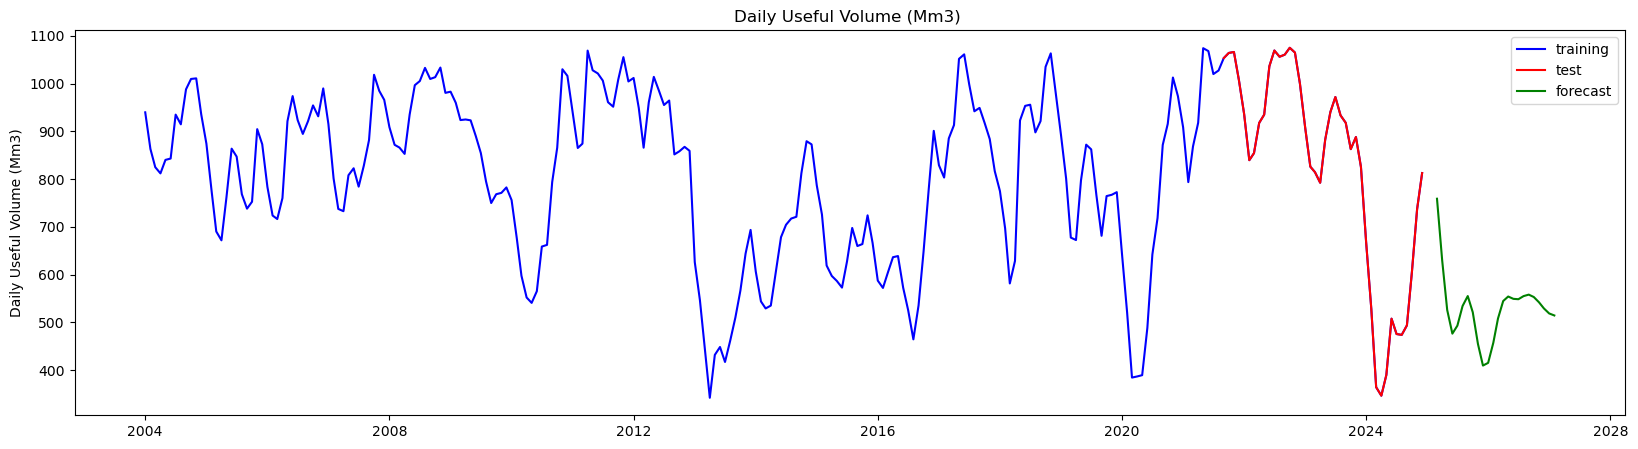

Daily Useful Energy Volume (MW/h) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.931056


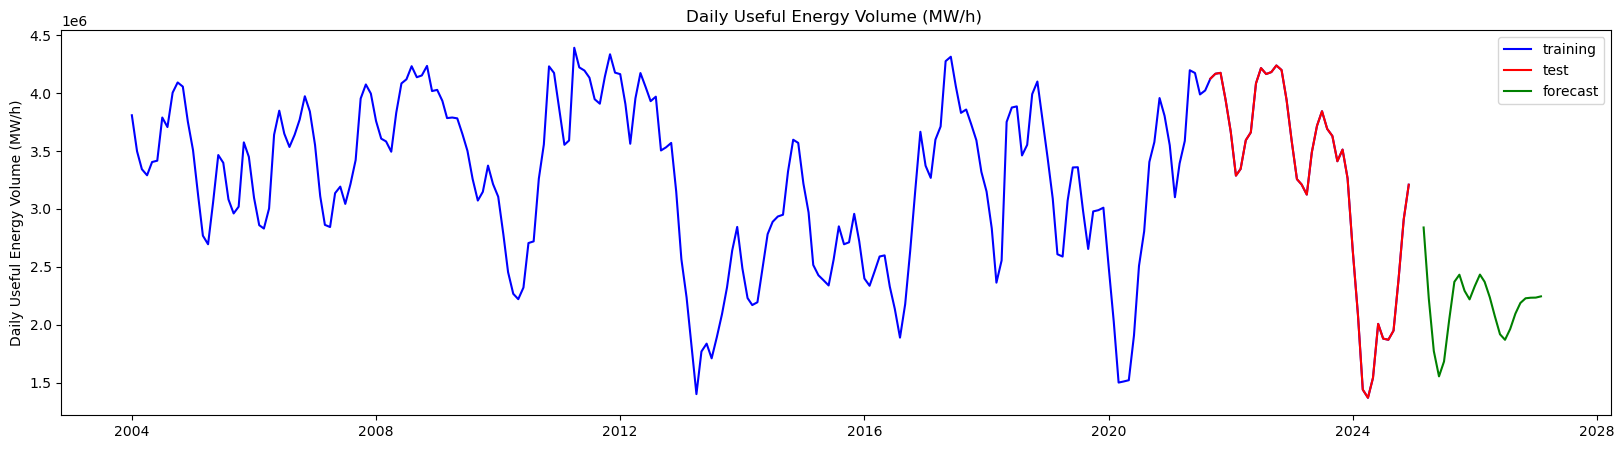

Energy Contributions (MW/h) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.584289


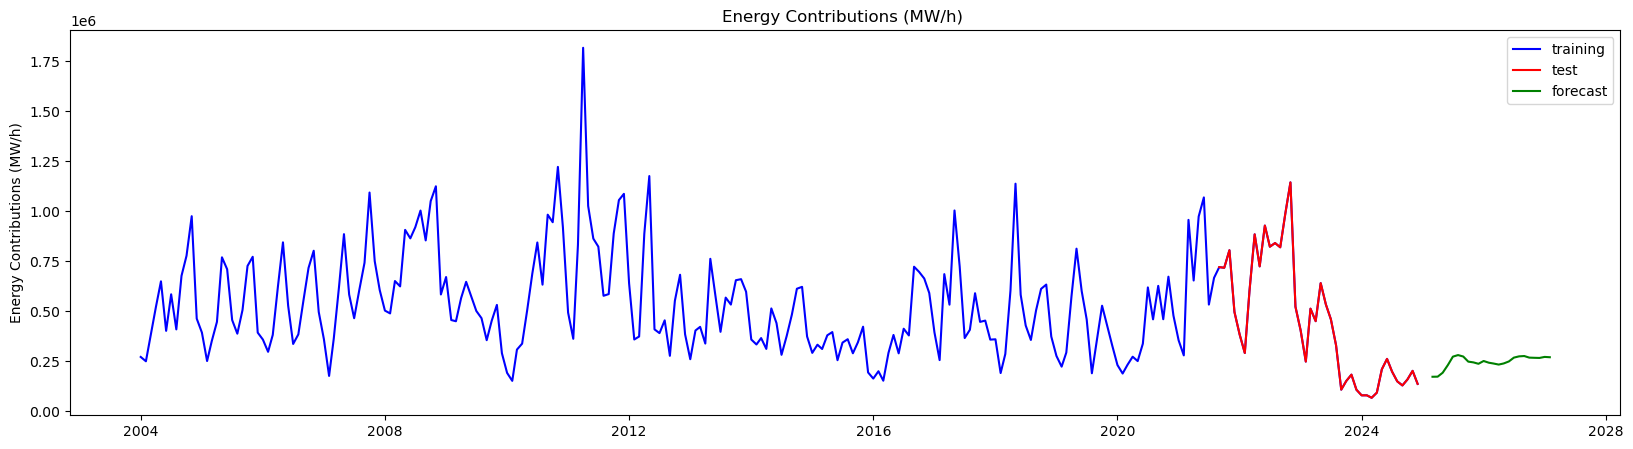

Flow Rate (m3/s) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.523727


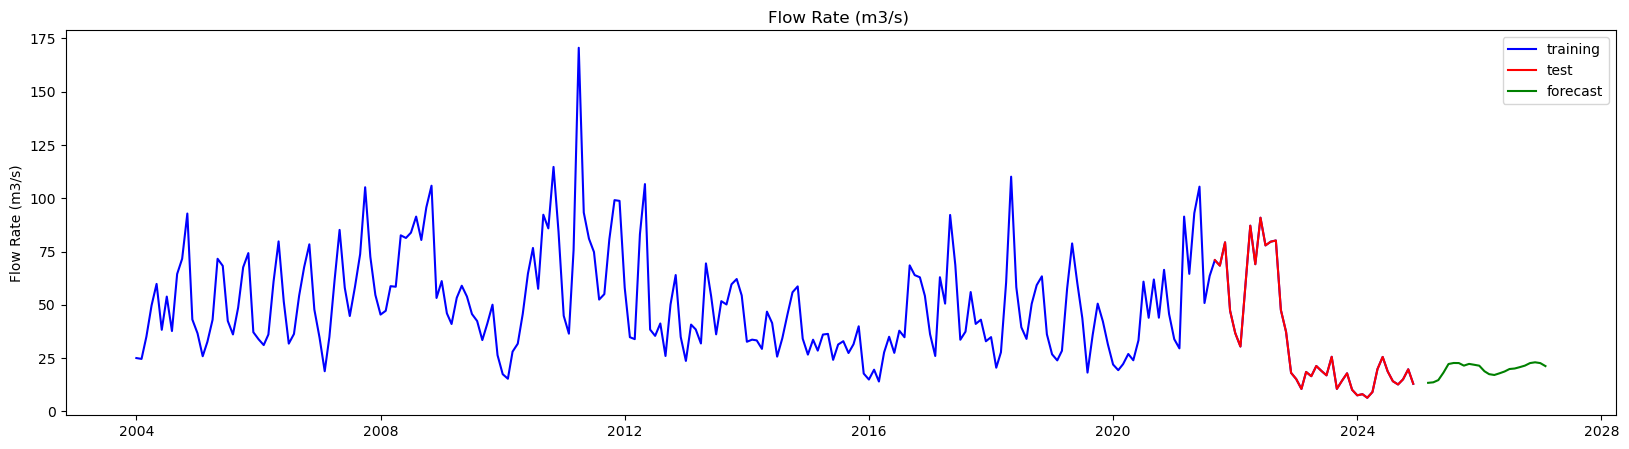

Wall time: 4min 5s


In [17]:
%%time
# Fitting and forecast using LSTM  -- output of train loss and valid loss is turned off
lstm_prediction_Penol = Penol_lstm(Penol,12,24)

In [18]:
lstm_prediction_Penol.head()

Daily Useful Volume (Mm3)  ...  Flow Rate (m3/s)
2025-02-28                 759.080017  ...             13.44
2025-03-31                 629.960022  ...             13.68
2025-04-30                 526.200012  ...             14.72
2025-05-31                 476.570007  ...             18.25
2025-06-30                 493.320007  ...             22.27

[5 rows x 4 columns]

## Urra HydropowerStation

In [19]:
### Get stations name and values

def get_value_name_Urra(Urra,i):
    station_value_Urra = Urra[[Urra.columns[i]]].dropna()
    station_name_Urra = Urra.columns[i]
    return station_value_Urra, station_name_Urra 

### Validate and test results

def valid_result_Urra(model, testX, y_test_tract1_array, scaler, station_value_Urra, split_row, lag):    
    testPredict = model.predict(testX)
    rSquare_test = r2_score(y_test_tract1_array, testPredict)
    print('Test R-squared is: %f'%rSquare_test)    
    testPredict = scaler.inverse_transform(testPredict)        
    new_test_tract1 = station_value_Urra.iloc[split_row:]       
    test_tract1_pred = new_test_tract1.iloc[lag:].copy()
    test_tract1_pred['Forecast'] = testPredict
    return test_tract1_pred 

### Calculate forecast using LSTM

def Urra_lstm(Urra, lag, months):    
    
    two_years_forecast_lstm = create_dates('2025-01-31', months) 
    
    for i in range(len(Urra.columns)):
        
        # preprocessing
        station_value_Urra, station_name_Urra = get_value_name_Urra(Urra,i)        
        train_tract1, test_tract1, split_row = train_test_split(station_value_Urra, station_name_Urra, 0.90)        
        train_tract1_scaled_df, test_tract1_scaled_df, scaler = data_transformation(train_tract1,test_tract1) 
        train_tract1 = timeseries_feature_builder(train_tract1_scaled_df, lag+1) 
        test_tract1 = timeseries_feature_builder(test_tract1_scaled_df, lag+1)               
        X_train_tract1_array, y_train_tract1_array, X_test_tract1_array, y_test_tract1_array = make_arrays(train_tract1, 
                                                                                                           test_tract1)        
        trainX = np.reshape(X_train_tract1_array, (X_train_tract1_array.shape[0],1,X_train_tract1_array.shape[1]))
        testX = np.reshape(X_test_tract1_array, (X_test_tract1_array.shape[0],1,X_test_tract1_array.shape[1]))                
        
        # LSTM modelling & forecast
        model = lstm_model(24, trainX, testX, y_train_tract1_array, y_test_tract1_array)             
        test_tract1_pred = valid_result_Urra(model, testX, y_test_tract1_array, scaler, station_value_Urra, split_row, lag)        
        two_years = forecast(model, testX, test_tract1, lag, scaler, months)       
        two_years_forecast_lstm[station_name_Urra] = np.array(two_years)       
        
        # plot result
        plt.figure(figsize=(20,5))
        plt.plot(station_value_Urra, color='blue', label ='training')
        plt.plot(test_tract1_pred[station_name_Urra], color='red', label ='test')
        plt.plot(two_years_forecast_lstm[station_name_Urra], color='green', label='forecast')         
        plt.ylabel(station_name_Urra + '')
        plt.legend(loc='upper right')
        plt.title(station_name_Urra + ' ')
        plt.show()        
        
    return(two_years_forecast_lstm)

### Plot forecast LSTM by variable

Daily Useful Volume (Mm3) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.560593


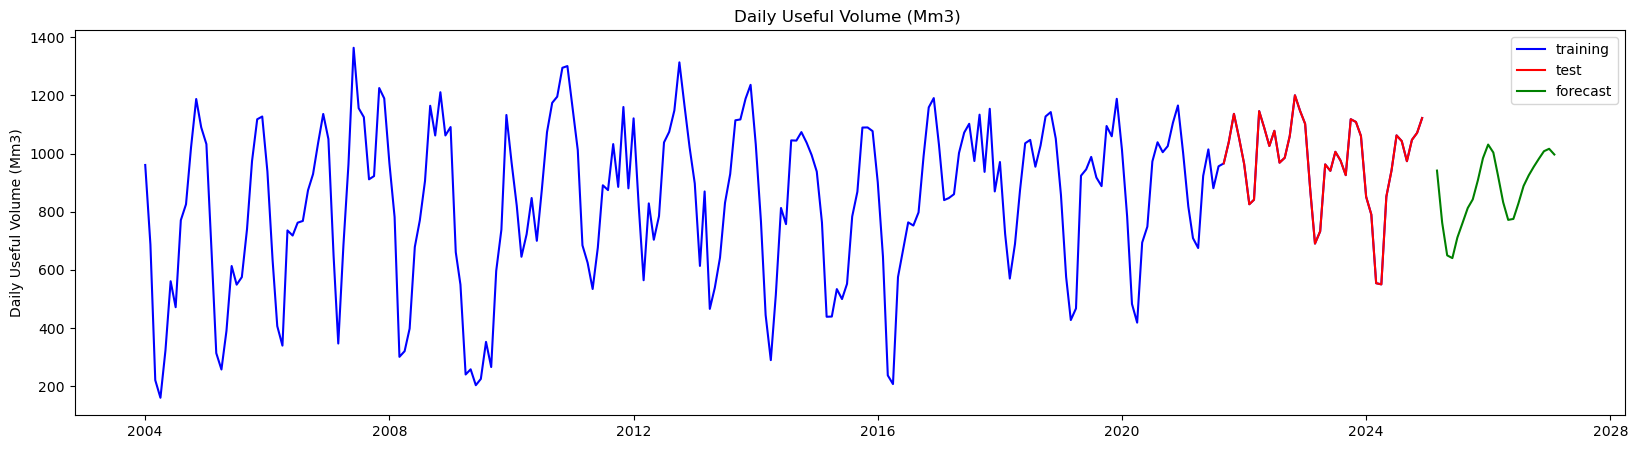

Daily Useful Energy Volume (MW/h) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.620636


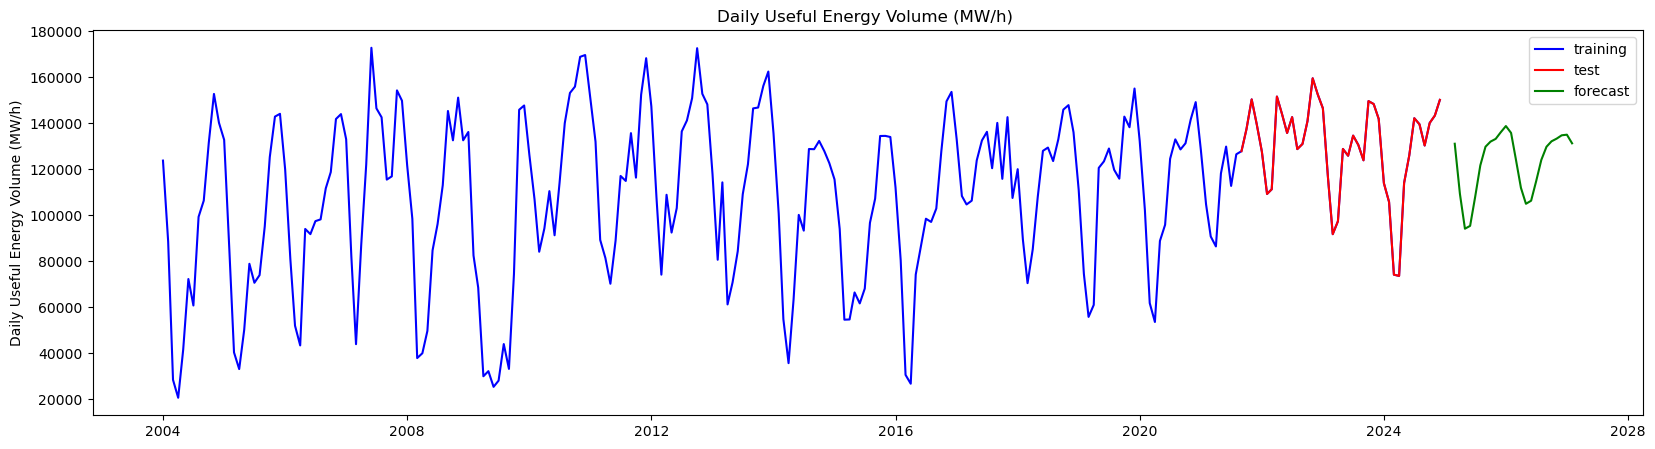

Energy Contributions (MW/h) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.662448


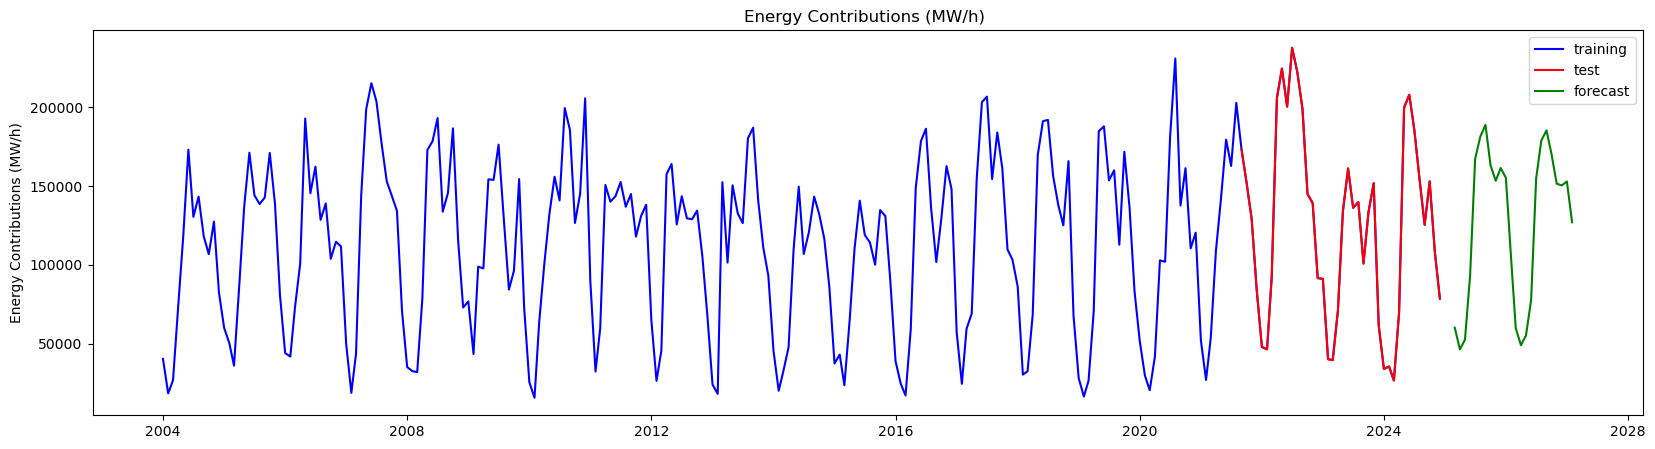

Flow Rate (m3/s) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.653748


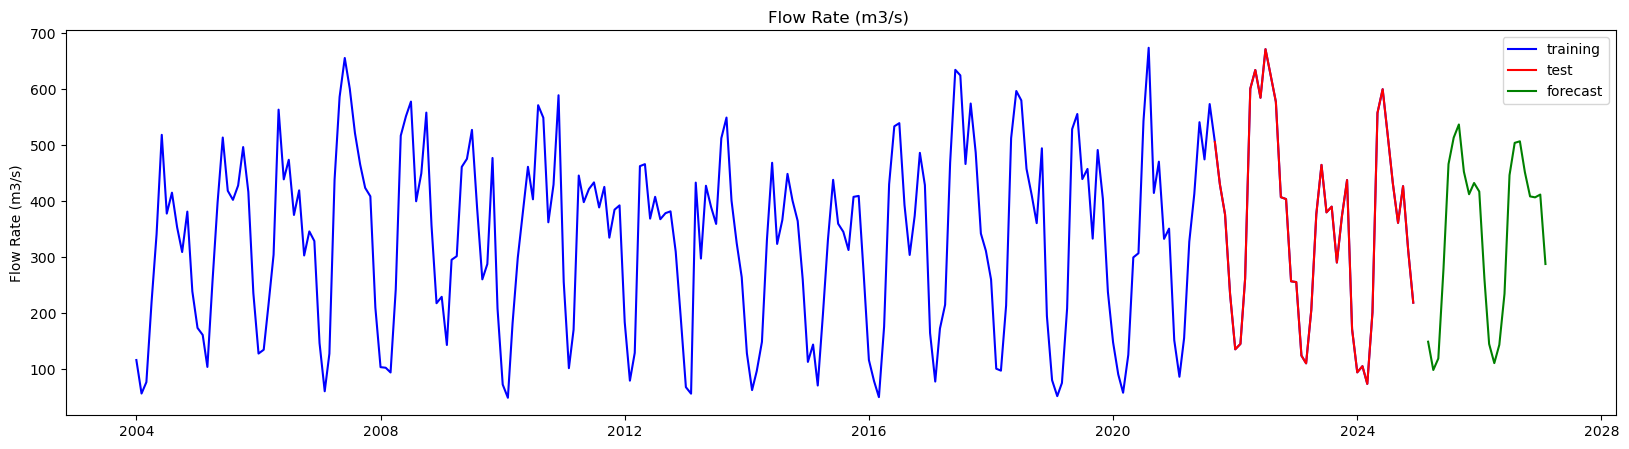

Wall time: 4min 11s


In [20]:
%%time
# Fitting and forecast using LSTM  -- output of train loss and valid loss is turned off
lstm_prediction_Urra = Urra_lstm(Urra,12,24)

In [21]:
lstm_prediction_Urra.head()

Daily Useful Volume (Mm3)  ...  Flow Rate (m3/s)
2025-02-28                 941.440002  ...        149.479996
2025-03-31                 762.119995  ...         99.010002
2025-04-30                 649.840027  ...        119.529999
2025-05-31                 640.429993  ...        279.929993
2025-06-30                 711.250000  ...        466.500000

[5 rows x 4 columns]

## Agregado Bogota HydropowerStation

### Get stations name and values

In [22]:
### Get stations name and values

def get_value_name_Agre_Bogota(Agre_Bogota,i):
    station_value_Agre_Bogota = Agre_Bogota[[Agre_Bogota.columns[i]]].dropna()
    station_name_Agre_Bogota = Agre_Bogota.columns[i]
    return station_value_Agre_Bogota, station_name_Agre_Bogota 

### Validate and test results

def valid_result_Agre_Bogota(model, testX, y_test_tract1_array, scaler, station_value_Agre_Bogota, split_row, lag):    
    testPredict = model.predict(testX)
    rSquare_test = r2_score(y_test_tract1_array, testPredict)
    print('Test R-squared is: %f'%rSquare_test)    
    testPredict = scaler.inverse_transform(testPredict)        
    new_test_tract1 = station_value_Agre_Bogota.iloc[split_row:]       
    test_tract1_pred = new_test_tract1.iloc[lag:].copy()
    test_tract1_pred['Forecast'] = testPredict
    return test_tract1_pred 

### Calculate forecast using LSTM

def Agre_Bogota_lstm(Agre_Bogota, lag, months):    
    
    two_years_forecast_lstm = create_dates('2025-01-31', months) 
    
    for i in range(len(Agre_Bogota.columns)):
        
        # preprocessing
        station_value_Agre_Bogota, station_name_Agre_Bogota = get_value_name_Agre_Bogota(Agre_Bogota,i)        
        train_tract1, test_tract1, split_row = train_test_split(station_value_Agre_Bogota, station_name_Agre_Bogota, 0.90)        
        train_tract1_scaled_df, test_tract1_scaled_df, scaler = data_transformation(train_tract1,test_tract1) 
        train_tract1 = timeseries_feature_builder(train_tract1_scaled_df, lag+1) 
        test_tract1 = timeseries_feature_builder(test_tract1_scaled_df, lag+1)               
        X_train_tract1_array, y_train_tract1_array, X_test_tract1_array, y_test_tract1_array = make_arrays(train_tract1, 
                                                                                                           test_tract1)        
        trainX = np.reshape(X_train_tract1_array, (X_train_tract1_array.shape[0],1,X_train_tract1_array.shape[1]))
        testX = np.reshape(X_test_tract1_array, (X_test_tract1_array.shape[0],1,X_test_tract1_array.shape[1]))                
        
        # LSTM modelling & forecast
        model = lstm_model(24, trainX, testX, y_train_tract1_array, y_test_tract1_array)             
        test_tract1_pred = valid_result_Agre_Bogota(model, testX, y_test_tract1_array, scaler, station_value_Agre_Bogota, split_row, lag)        
        two_years = forecast(model, testX, test_tract1, lag, scaler, months)       
        two_years_forecast_lstm[station_name_Agre_Bogota] = np.array(two_years)       
        
        # plot result
        plt.figure(figsize=(20,5))
        plt.plot(station_value_Agre_Bogota, color='blue', label ='training')
        plt.plot(test_tract1_pred[station_name_Agre_Bogota], color='red', label ='test')
        plt.plot(two_years_forecast_lstm[station_name_Agre_Bogota], color='green', label='forecast')         
        plt.ylabel(station_name_Agre_Bogota + '')
        plt.legend(loc='upper right')
        plt.title(station_name_Agre_Bogota + ' ')
        plt.show()        
        
    return(two_years_forecast_lstm)

Daily Useful Volume (Mm3) total samples:  248
Training samples:  200
Testing samples:  48
Test R-squared is: 0.880654


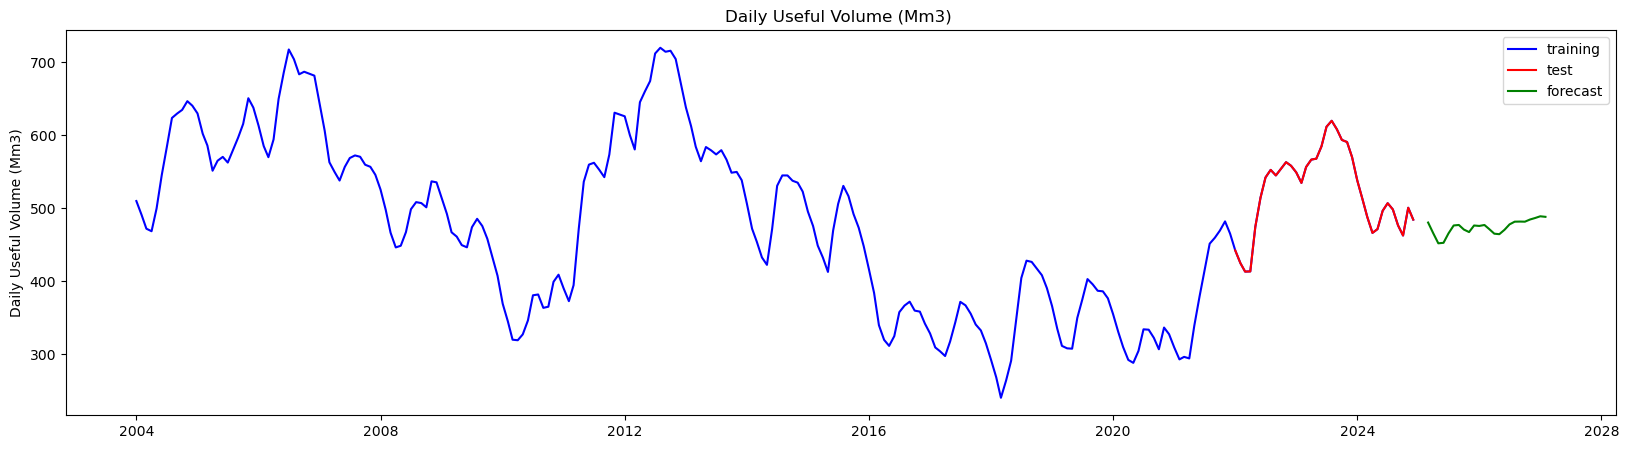

Daily Useful Energy Volume (MW/h) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.885703


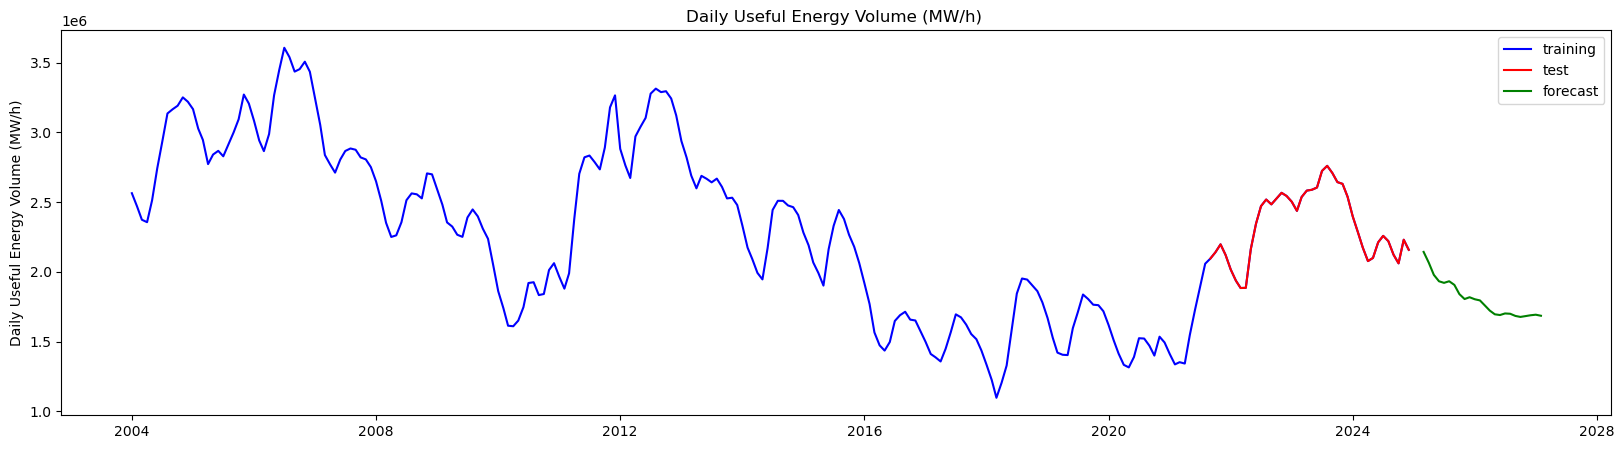

Energy Contributions (MW/h) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: -0.464718


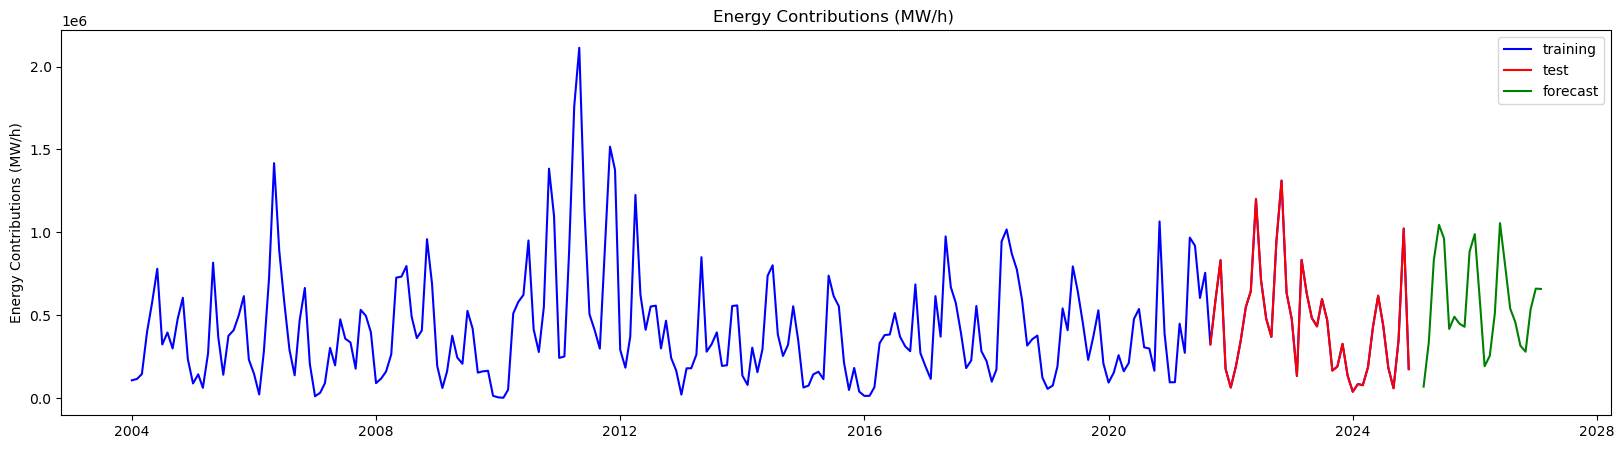

Flow Rate (m3/s) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.117879


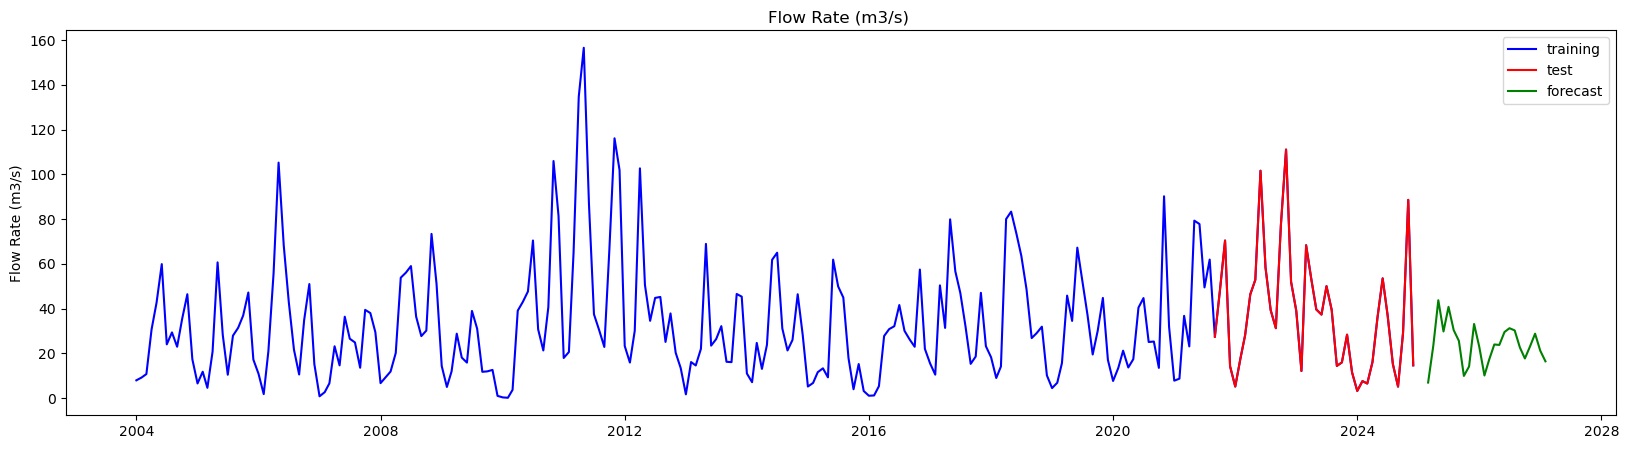

Wall time: 2min 18s


In [23]:
%%time
# Fitting and forecast using LSTM  -- output of train loss and valid loss is turned off
lstm_prediction_Agre_Bogota = Agre_Bogota_lstm(Agre_Bogota,12,24)

In [24]:
lstm_prediction_Agre_Bogota.head()

Daily Useful Volume (Mm3)  ...  Flow Rate (m3/s)
2025-02-28                 480.559998  ...          6.970000
2025-03-31                 465.750000  ...         23.440001
2025-04-30                 452.130005  ...         43.750000
2025-05-31                 452.820007  ...         29.799999
2025-06-30                 465.750000  ...         40.799999

[5 rows x 4 columns]

## Guavio HydropowerStation

### Get stations name and values

In [25]:
### Get stations name and values

def get_value_name_Guavio(Guavio,i):
    station_value_Guavio = Guavio[[Guavio.columns[i]]].dropna()
    station_name_Guavio = Guavio.columns[i]
    return station_value_Guavio, station_name_Guavio 

### Validate and test results

def valid_result_Guavio(model, testX, y_test_tract1_array, scaler, station_value_Guavio, split_row, lag):    
    testPredict = model.predict(testX)
    rSquare_test = r2_score(y_test_tract1_array, testPredict)
    print('Test R-squared is: %f'%rSquare_test)    
    testPredict = scaler.inverse_transform(testPredict)        
    new_test_tract1 = station_value_Guavio.iloc[split_row:]       
    test_tract1_pred = new_test_tract1.iloc[lag:].copy()
    test_tract1_pred['Forecast'] = testPredict
    return test_tract1_pred 

### Calculate forecast using LSTM

def Guavio_lstm(Guavio, lag, months):    
    
    two_years_forecast_lstm = create_dates('2025-01-31', months) 
    
    for i in range(len(Guavio.columns)):
        
        # preprocessing
        station_value_Guavio, station_name_Guavio = get_value_name_Guavio(Guavio,i)        
        train_tract1, test_tract1, split_row = train_test_split(station_value_Guavio, station_name_Guavio, 0.90)        
        train_tract1_scaled_df, test_tract1_scaled_df, scaler = data_transformation(train_tract1,test_tract1) 
        train_tract1 = timeseries_feature_builder(train_tract1_scaled_df, lag+1) 
        test_tract1 = timeseries_feature_builder(test_tract1_scaled_df, lag+1)               
        X_train_tract1_array, y_train_tract1_array, X_test_tract1_array, y_test_tract1_array = make_arrays(train_tract1, 
                                                                                                           test_tract1)        
        trainX = np.reshape(X_train_tract1_array, (X_train_tract1_array.shape[0],1,X_train_tract1_array.shape[1]))
        testX = np.reshape(X_test_tract1_array, (X_test_tract1_array.shape[0],1,X_test_tract1_array.shape[1]))                
        
        # LSTM modelling & forecast
        model = lstm_model(24, trainX, testX, y_train_tract1_array, y_test_tract1_array)             
        test_tract1_pred = valid_result_Guavio(model, testX, y_test_tract1_array, scaler, station_value_Guavio, split_row, lag)        
        two_years = forecast(model, testX, test_tract1, lag, scaler, months)       
        two_years_forecast_lstm[station_name_Guavio] = np.array(two_years)       
        
        # plot result
        plt.figure(figsize=(20,5))
        plt.plot(station_value_Guavio, color='blue', label ='training')
        plt.plot(test_tract1_pred[station_name_Guavio], color='red', label ='test')
        plt.plot(two_years_forecast_lstm[station_name_Guavio], color='green', label='forecast')         
        plt.ylabel(station_name_Guavio + '')
        plt.legend(loc='upper right')
        plt.title(station_name_Guavio + ' ')
        plt.show()         
        
    return(two_years_forecast_lstm)

Daily Useful Volume (Mm3) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.790802


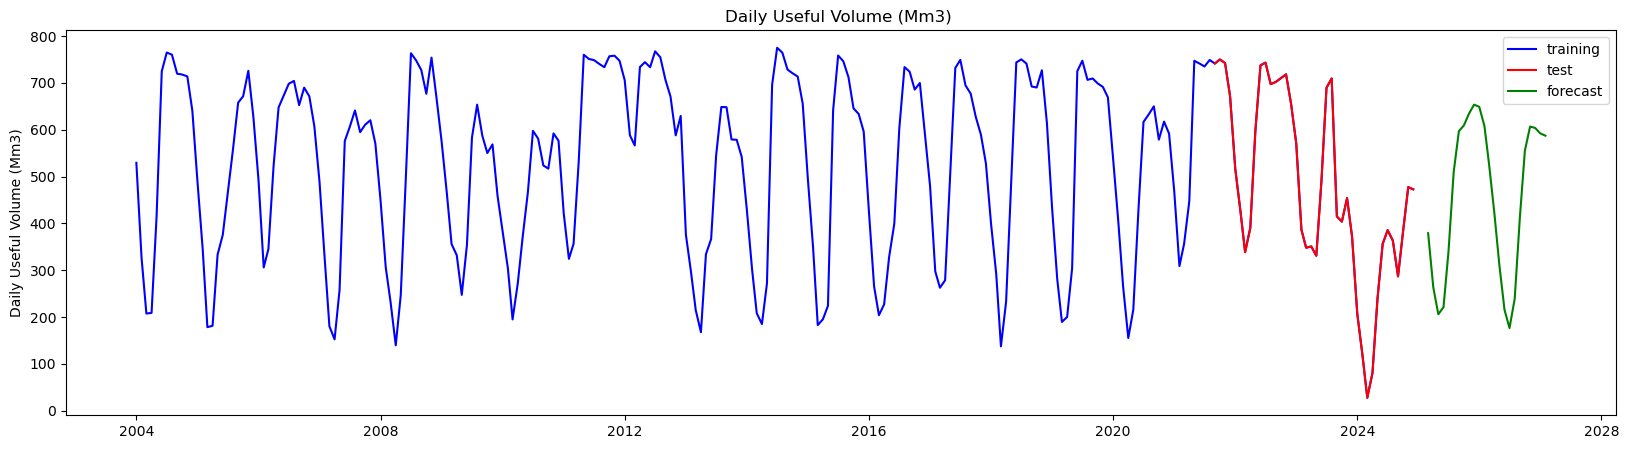

Daily Useful Energy Volume (MW/h) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.727534


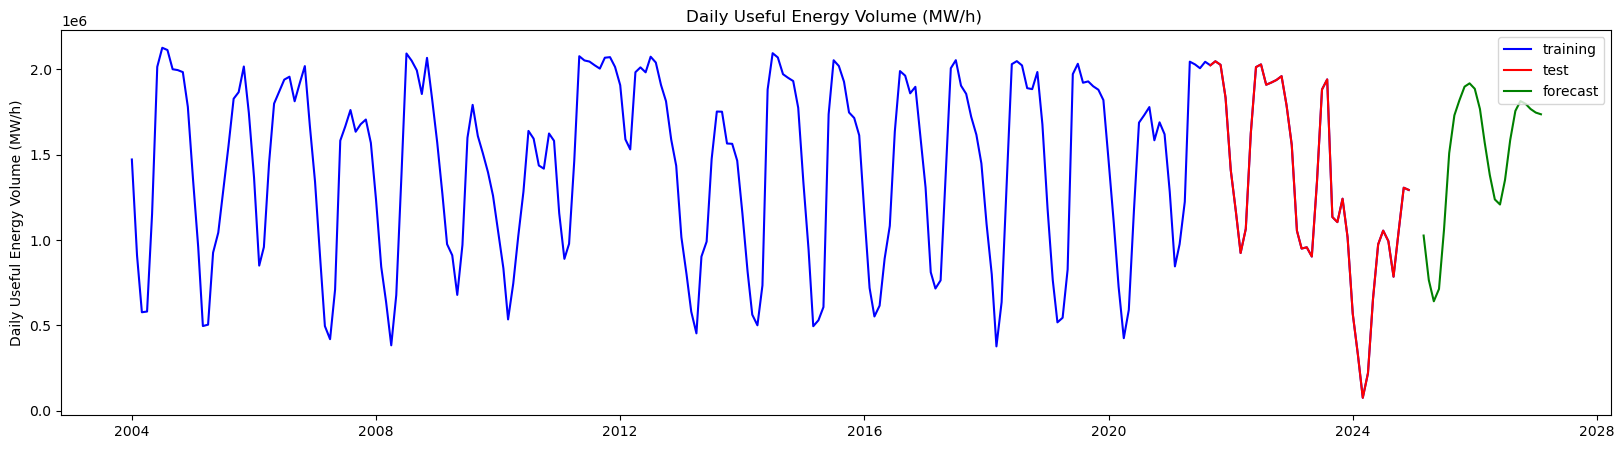

Energy Contributions (MW/h) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.659313


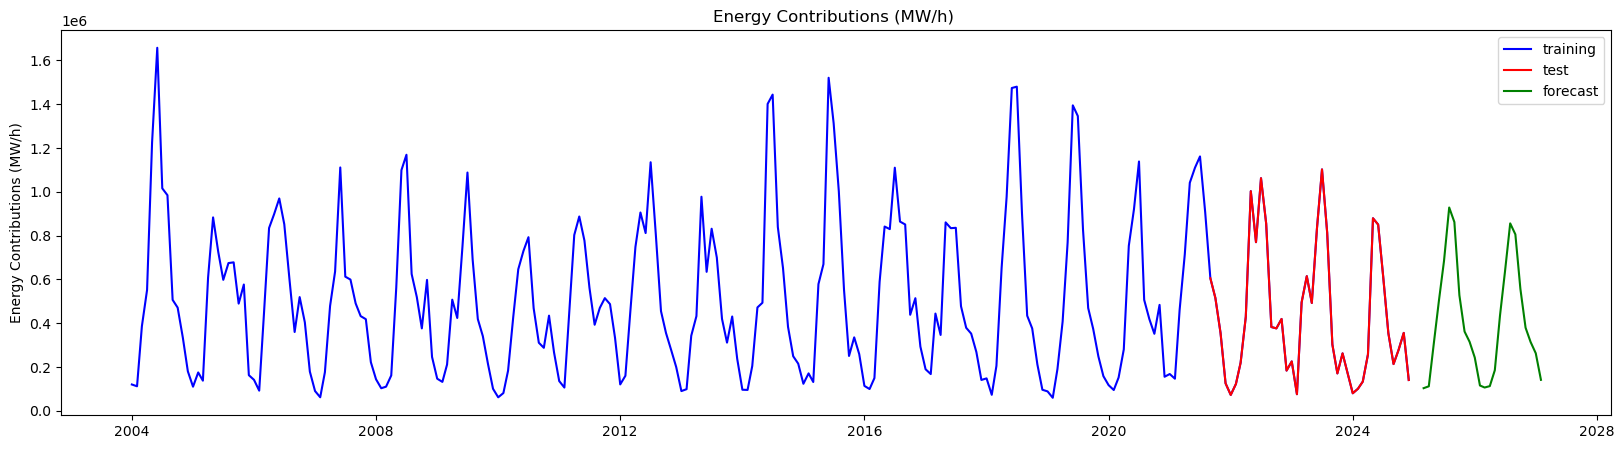

Flow Rate (m3/s) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.645964


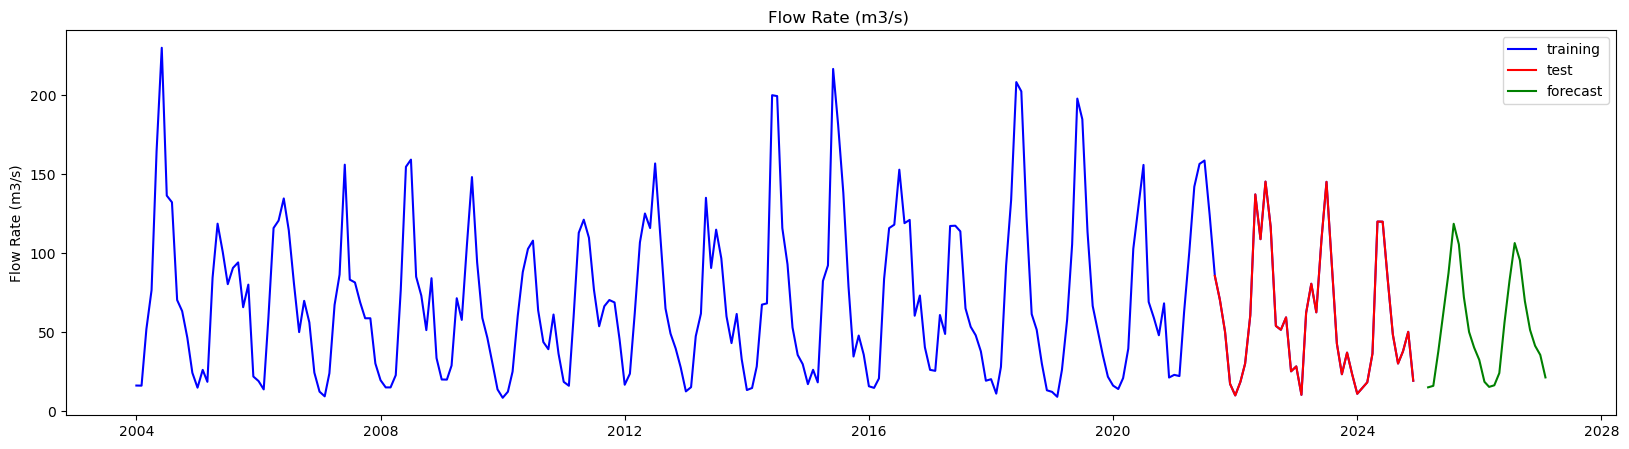

Wall time: 1min 57s


In [26]:
%%time
# Fitting and forecast using LSTM  -- output of train loss and valid loss is turned off
lstm_prediction_Guavio = Guavio_lstm(Guavio,12,24)

In [27]:
lstm_prediction_Guavio.head()

Daily Useful Volume (Mm3)  ...  Flow Rate (m3/s)
2025-02-28                 379.010010  ...         15.030000
2025-03-31                 263.179993  ...         15.980000
2025-04-30                 205.940002  ...         37.799999
2025-05-31                 221.029999  ...         63.020000
2025-06-30                 340.179993  ...         87.440002

[5 rows x 4 columns]

## Salvajina HydropowerStation

### Get stations name and values

In [28]:
### Get stations name and values

def get_value_name_Salvajina(Salvajina,i):
    station_value_Salvajina = Salvajina[[Salvajina.columns[i]]].dropna()
    station_name_Salvajina = Salvajina.columns[i]
    return station_value_Salvajina, station_name_Salvajina 

### Validate and test results

def valid_result_Salvajina(model, testX, y_test_tract1_array, scaler, station_value_Salvajina, split_row, lag):    
    testPredict = model.predict(testX)
    rSquare_test = r2_score(y_test_tract1_array, testPredict)
    print('Test R-squared is: %f'%rSquare_test)    
    testPredict = scaler.inverse_transform(testPredict)        
    new_test_tract1 = station_value_Salvajina.iloc[split_row:]       
    test_tract1_pred = new_test_tract1.iloc[lag:].copy()
    test_tract1_pred['Forecast'] = testPredict
    return test_tract1_pred 

### Calculate forecast using LSTM

def Salvajina_lstm(Salvajina, lag, months):    
    
    two_years_forecast_lstm = create_dates('2025-01-31', months) 
    
    for i in range(len(Salvajina.columns)):
        
        # preprocessing
        station_value_Salvajina, station_name_Salvajina = get_value_name_Salvajina(Salvajina,i)        
        train_tract1, test_tract1, split_row = train_test_split(station_value_Salvajina, station_name_Salvajina, 0.90)        
        train_tract1_scaled_df, test_tract1_scaled_df, scaler = data_transformation(train_tract1,test_tract1) 
        train_tract1 = timeseries_feature_builder(train_tract1_scaled_df, lag+1) 
        test_tract1 = timeseries_feature_builder(test_tract1_scaled_df, lag+1)               
        X_train_tract1_array, y_train_tract1_array, X_test_tract1_array, y_test_tract1_array = make_arrays(train_tract1, 
                                                                                                           test_tract1)        
        trainX = np.reshape(X_train_tract1_array, (X_train_tract1_array.shape[0],1,X_train_tract1_array.shape[1]))
        testX = np.reshape(X_test_tract1_array, (X_test_tract1_array.shape[0],1,X_test_tract1_array.shape[1]))                
        
        # LSTM modelling & forecast
        model = lstm_model(24, trainX, testX, y_train_tract1_array, y_test_tract1_array)             
        test_tract1_pred = valid_result_Salvajina(model, testX, y_test_tract1_array, scaler, station_value_Salvajina, split_row, lag)        
        two_years = forecast(model, testX, test_tract1, lag, scaler, months)       
        two_years_forecast_lstm[station_name_Salvajina] = np.array(two_years)       
        
         # plot result
        plt.figure(figsize=(20,5))
        plt.plot(station_value_Salvajina, color='blue', label ='training')
        plt.plot(test_tract1_pred[station_name_Salvajina], color='red', label ='test')
        plt.plot(two_years_forecast_lstm[station_name_Salvajina], color='green', label='forecast')         
        plt.ylabel(station_name_Salvajina + '')
        plt.legend(loc='upper right')
        plt.title(station_name_Salvajina + ' ')
        plt.show()      
        
    return(two_years_forecast_lstm)

Daily Useful Volume (Mm3) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.520591


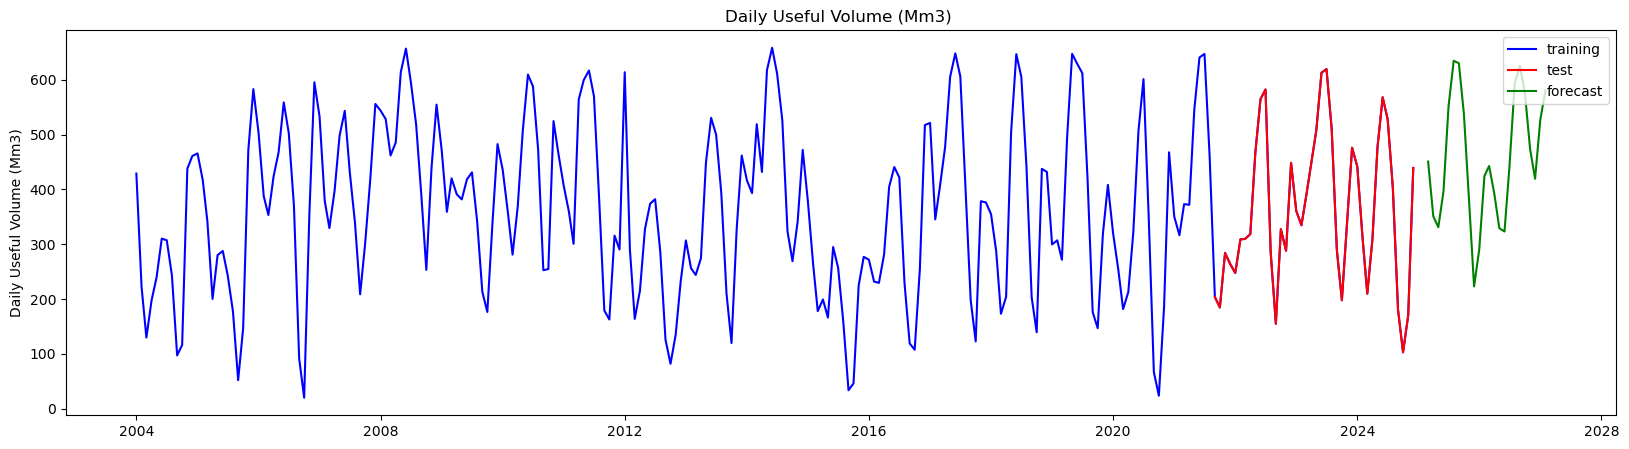

Daily Useful Energy Volume (MW/h) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.763508


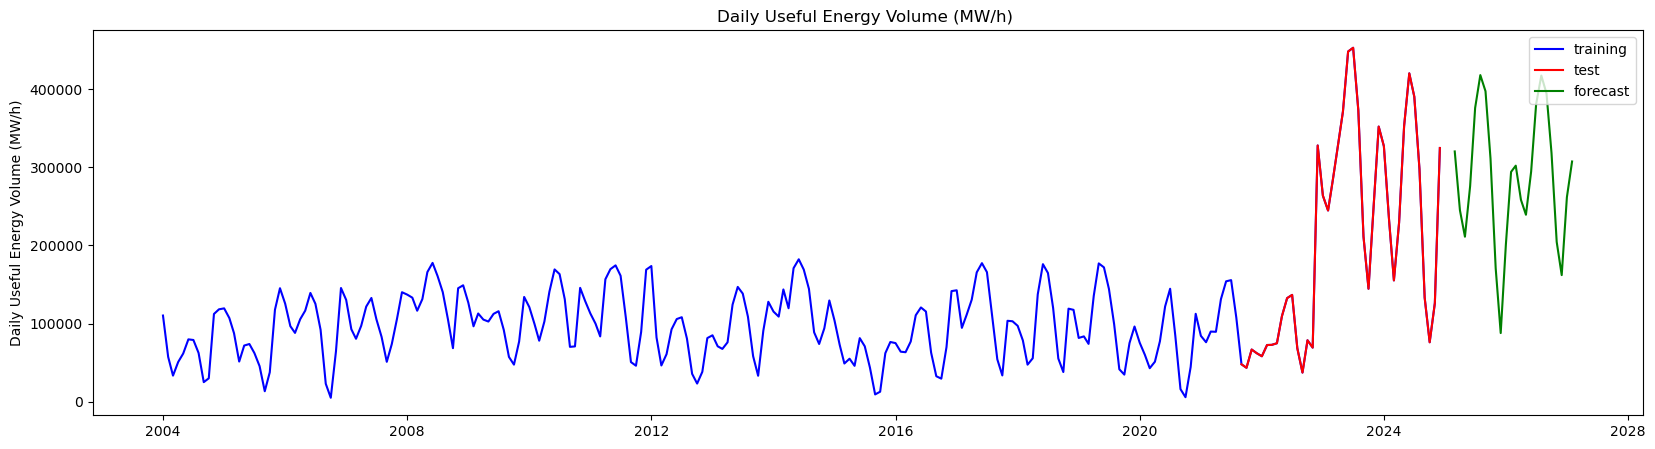

Energy Contributions (MW/h) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.251938


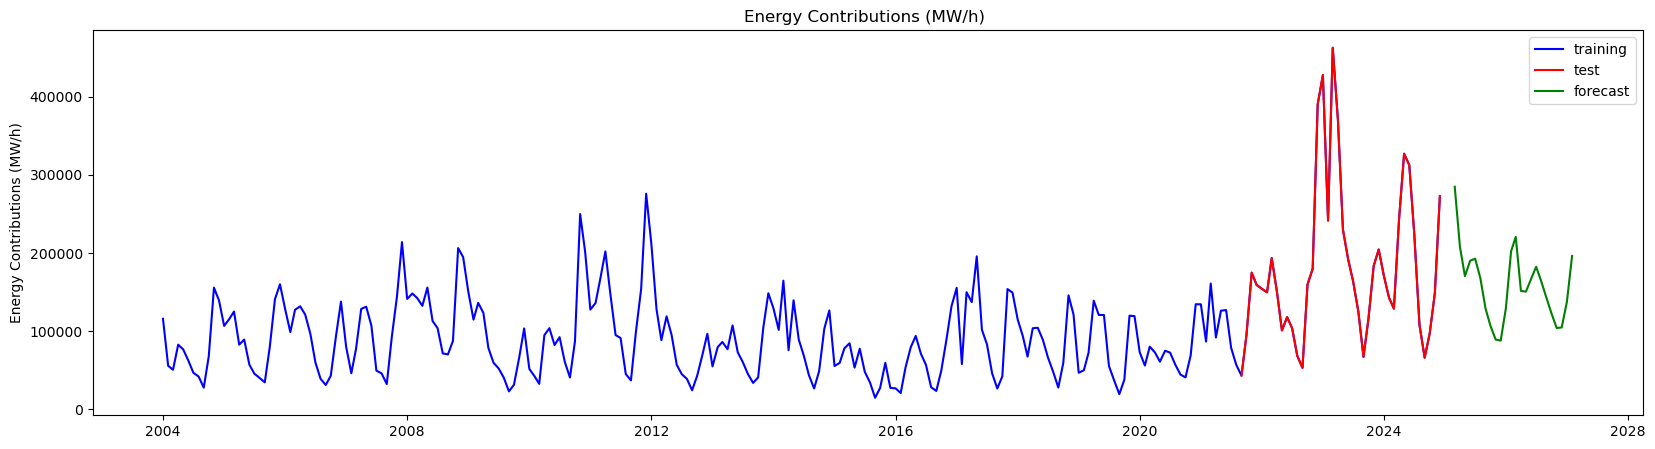

Flow Rate (m3/s) total samples:  252
Training samples:  200
Testing samples:  52
Test R-squared is: 0.517693


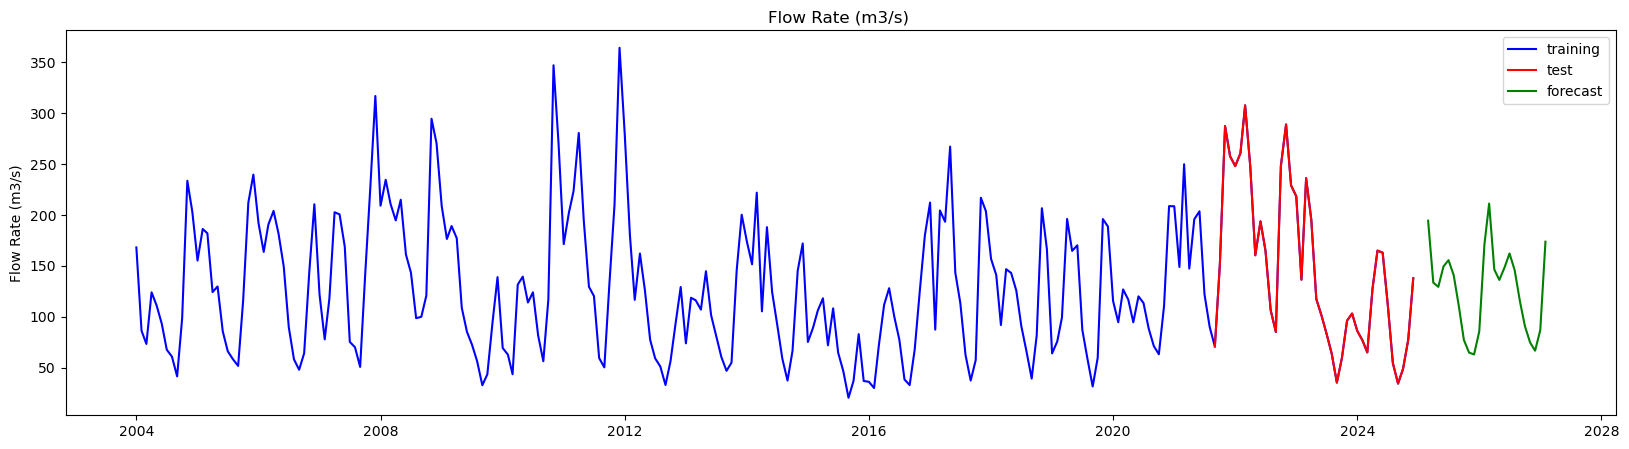

Wall time: 2min 50s


In [29]:
%%time
# Fitting and forecast using LSTM  -- output of train loss and valid loss is turned off
lstm_prediction_Salvajina = Salvajina_lstm(Salvajina,12,24)

In [30]:
lstm_prediction_Salvajina.head()

Daily Useful Volume (Mm3)  ...  Flow Rate (m3/s)
2025-02-28                 450.589996  ...        194.500000
2025-03-31                 350.690002  ...        133.550003
2025-04-30                 330.869995  ...        129.460007
2025-05-31                 396.540009  ...        149.529999
2025-06-30                 550.830017  ...        155.679993

[5 rows x 4 columns]